In [87]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [89]:
strokedf=df.copy()

In [90]:
strokedf

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## The dataset used in this project contains medical records of patients and their associated risk factors for stroke

# features:

Id: Unique identification number for each patient.

Age: The age of the patient.

Hypertension: Whether the patient has hypertension (1 for yes, 0 for no).

Heart Disease: Whether the patient has a history of heart disease (1 for yes, 0 for no).

Ever Married: Whether the patient has been married (1 for yes, 0 for no).

Work Type: The type of work the patient does (e.g., private, self-employed, government, children).

Residence Type: Whether the patient resides in an urban or rural area.

Glucose Level: The patient's glucose level.

BMI (Body Mass Index): A measure of body fat based on height and weight.

Smoking Status: The smoking habit of the patient (e.g., never smoked, formerly smoked, currently smoking).

Stroke: The target variable indicating whether the patient had a stroke (1 for yes, 0 for no).

In [91]:
strokedf.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [92]:
strokedf.shape

(5110, 12)

In [93]:
strokedf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [94]:
strokedf.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Insights

Insights:Target Variable (stroke):

The mean value is 0.0487, indicating that only about 4.87% of the patients in the dataset had a stroke. This shows class imbalance, which might require handling during model :)

#Most patients do not have heart disease , hypertension

# Average Glucose Level in Blood

Mean: 106.15 around the normal range for fasting glucose levels

Std: 45.28 (high variability, with potential outliers).

Min: 55.12  normal range

Max: 271.74  very high, likely diabetic levels

Patients with high glucose levels may correlate with stroke risk, which should be explored further


#Outliers in BMI values might need to be handled +201 MISSING VALUES

In [95]:
strokedf.drop(columns=['id'],axis=1,inplace=True) 
strokedf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [96]:
# Remove rows where gender is 'Other'
strokedf = strokedf[strokedf['gender'] != 'Other']

strokedf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Data cleaning 

We noticed that the 'bmi' column had missing values, and since it's a numerical column, we used the median to fill the missing entries. Using the median is often preferred for numerical data since it’s less affected by outliers, compared to the mean. After applying this, all missing values were handled, and we verified there were no more missing values.

In [97]:
strokedf['bmi'].fillna(strokedf['bmi'].median(),inplace=True)

In [98]:
strokedf.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [99]:
strokedf.drop_duplicates(inplace=True)

In [100]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [101]:
strokedf.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


* it seems that data is arranged accourding to the occourence of stroke, so we have to shuffle data  

In [102]:
# strokedf = strokedf.sample(frac=1, random_state=1).reset_index(drop=True)
# strokedf.head()

#### Outliers detection

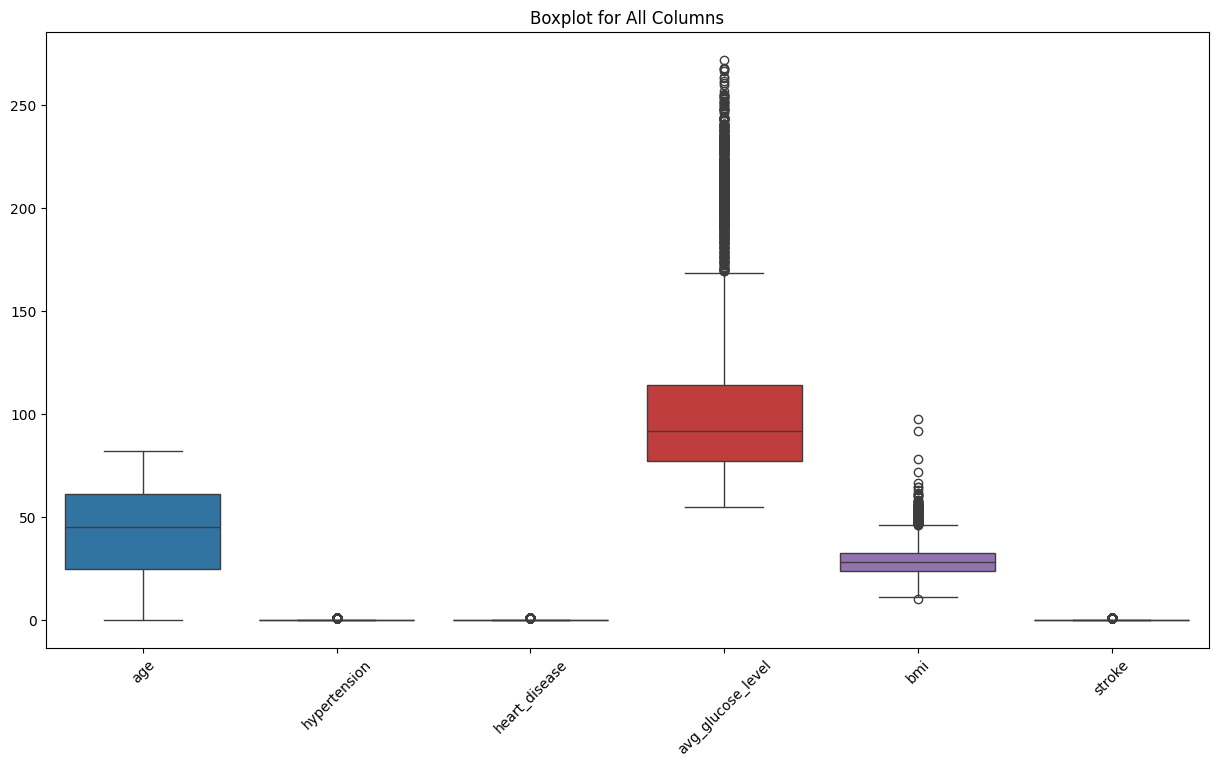

In [103]:
#Boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=strokedf)
plt.xticks(rotation=45)  
plt.title("Boxplot for All Columns")
plt.show()

avg_glucose_level and bmi columns show significant outliers
we need to perform outliers on them

Outliers in 'avg_glucose_level': We noticed some extreme values in the 'avg_glucose_level', with values going up to 271.74, which is far above the 75th percentile value of 114.09. These could either represent valid high glucose levels in patients with diabetes or might be data entry errors. We applied an IQR (Interquartile Range) method to identify and cap the extreme values within a reasonable range. After that, we applied transformations like log transformations for more skewed data, though we left this option commented out for future experimentation.

Outliers in 'bmi': We saw extreme values in the 'bmi' column, with a maximum value of 97.6, which could indicate extreme cases of obesity or data entry errors. Similar to the glucose levels, we identified and capped the outliers using IQR, ensuring that the values fell within a more standard range.

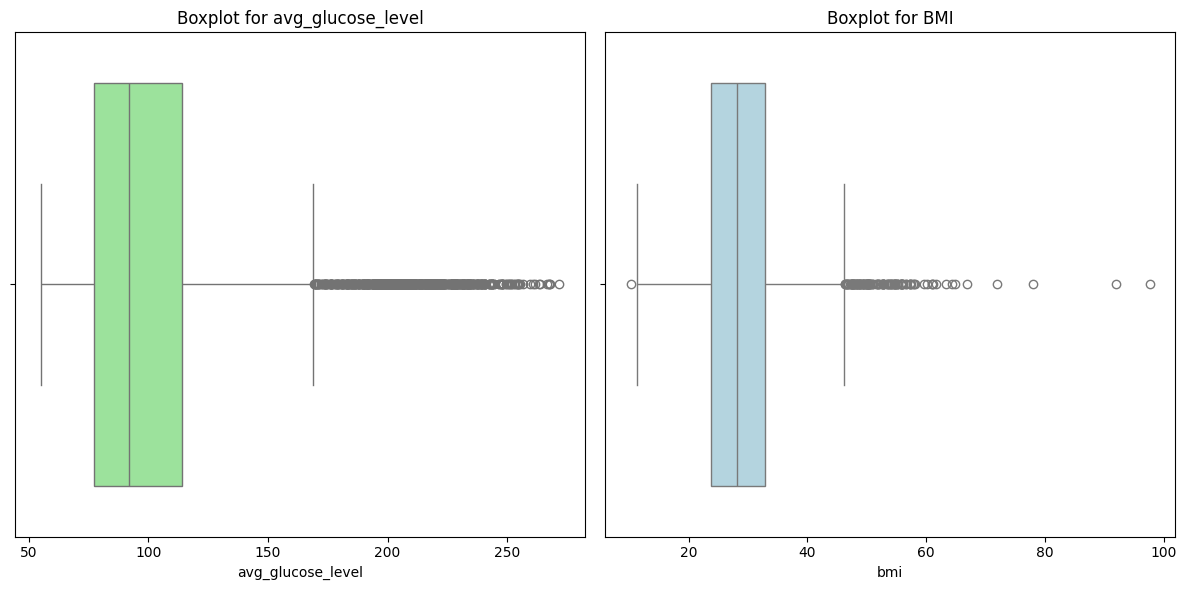

In [104]:
# Create a boxplot to visualize outliers for 'avg_glucose_level' and 'bmi'
plt.figure(figsize=(12, 6))

# Plot for 'avg_glucose_level'
plt.subplot(1, 2, 1)
sns.boxplot(x=strokedf['avg_glucose_level'], color='lightgreen')
plt.title('Boxplot for avg_glucose_level')

# Plot for 'bmi'
plt.subplot(1, 2, 2)
sns.boxplot(x=strokedf['bmi'], color='lightblue')
plt.title('Boxplot for BMI')

plt.tight_layout()
plt.show()

In [105]:
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

handle_outliers_iqr(strokedf, 'avg_glucose_level')
handle_outliers_iqr(strokedf, 'bmi')

print(strokedf[['avg_glucose_level', 'bmi']].describe())


avg_glucose_level: Lower Bound = 21.964999999999982, Upper Bound = 169.365
bmi: Lower Bound = 10.300000000000006, Upper Bound = 46.29999999999999
       avg_glucose_level          bmi
count        5109.000000  5109.000000
mean          100.988838    28.691642
std            33.214602     7.121011
min            55.120000    10.300000
25%            77.240000    23.800000
50%            91.880000    28.100000
75%           114.090000    32.800000
max           169.365000    46.300000


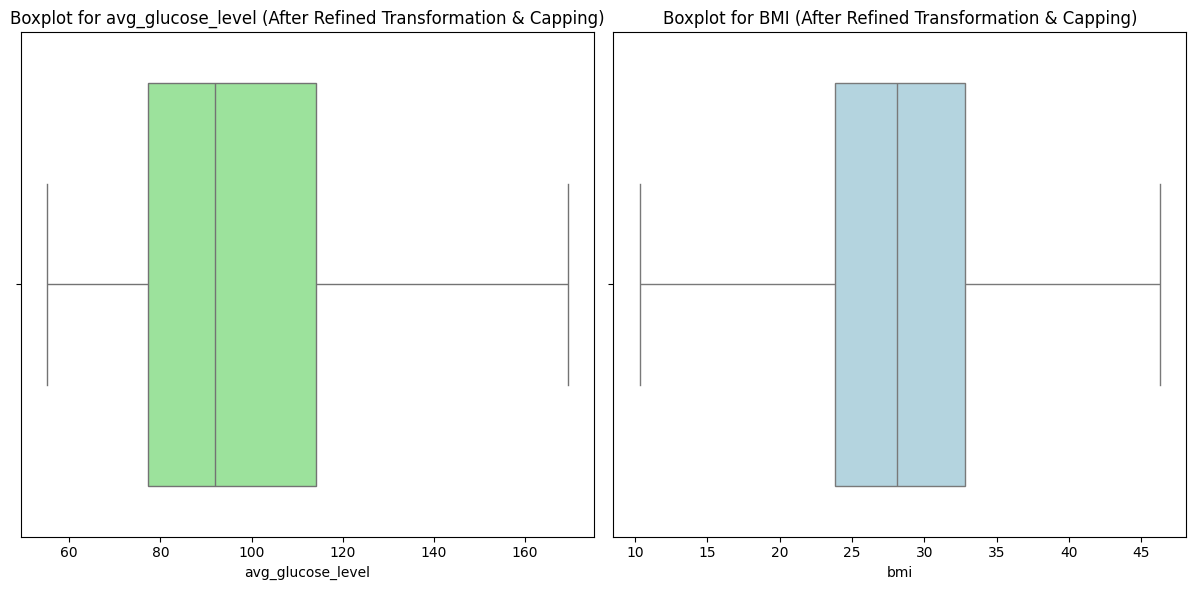

In [106]:
# Create a boxplot to visualize outliers for 'avg_glucose_level' and 'bmi'
plt.figure(figsize=(12, 6))

# Plot for 'avg_glucose_level'
plt.subplot(1, 2, 1)
sns.boxplot(x=strokedf['avg_glucose_level'], color='lightgreen')
plt.title('Boxplot for avg_glucose_level (After Refined Transformation & Capping)')

# Plot for 'bmi'
plt.subplot(1, 2, 2)
sns.boxplot(x=strokedf['bmi'], color='lightblue')
plt.title('Boxplot for BMI (After Refined Transformation & Capping)')

plt.tight_layout()
plt.show()

## Explory data analysis (EDA )

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

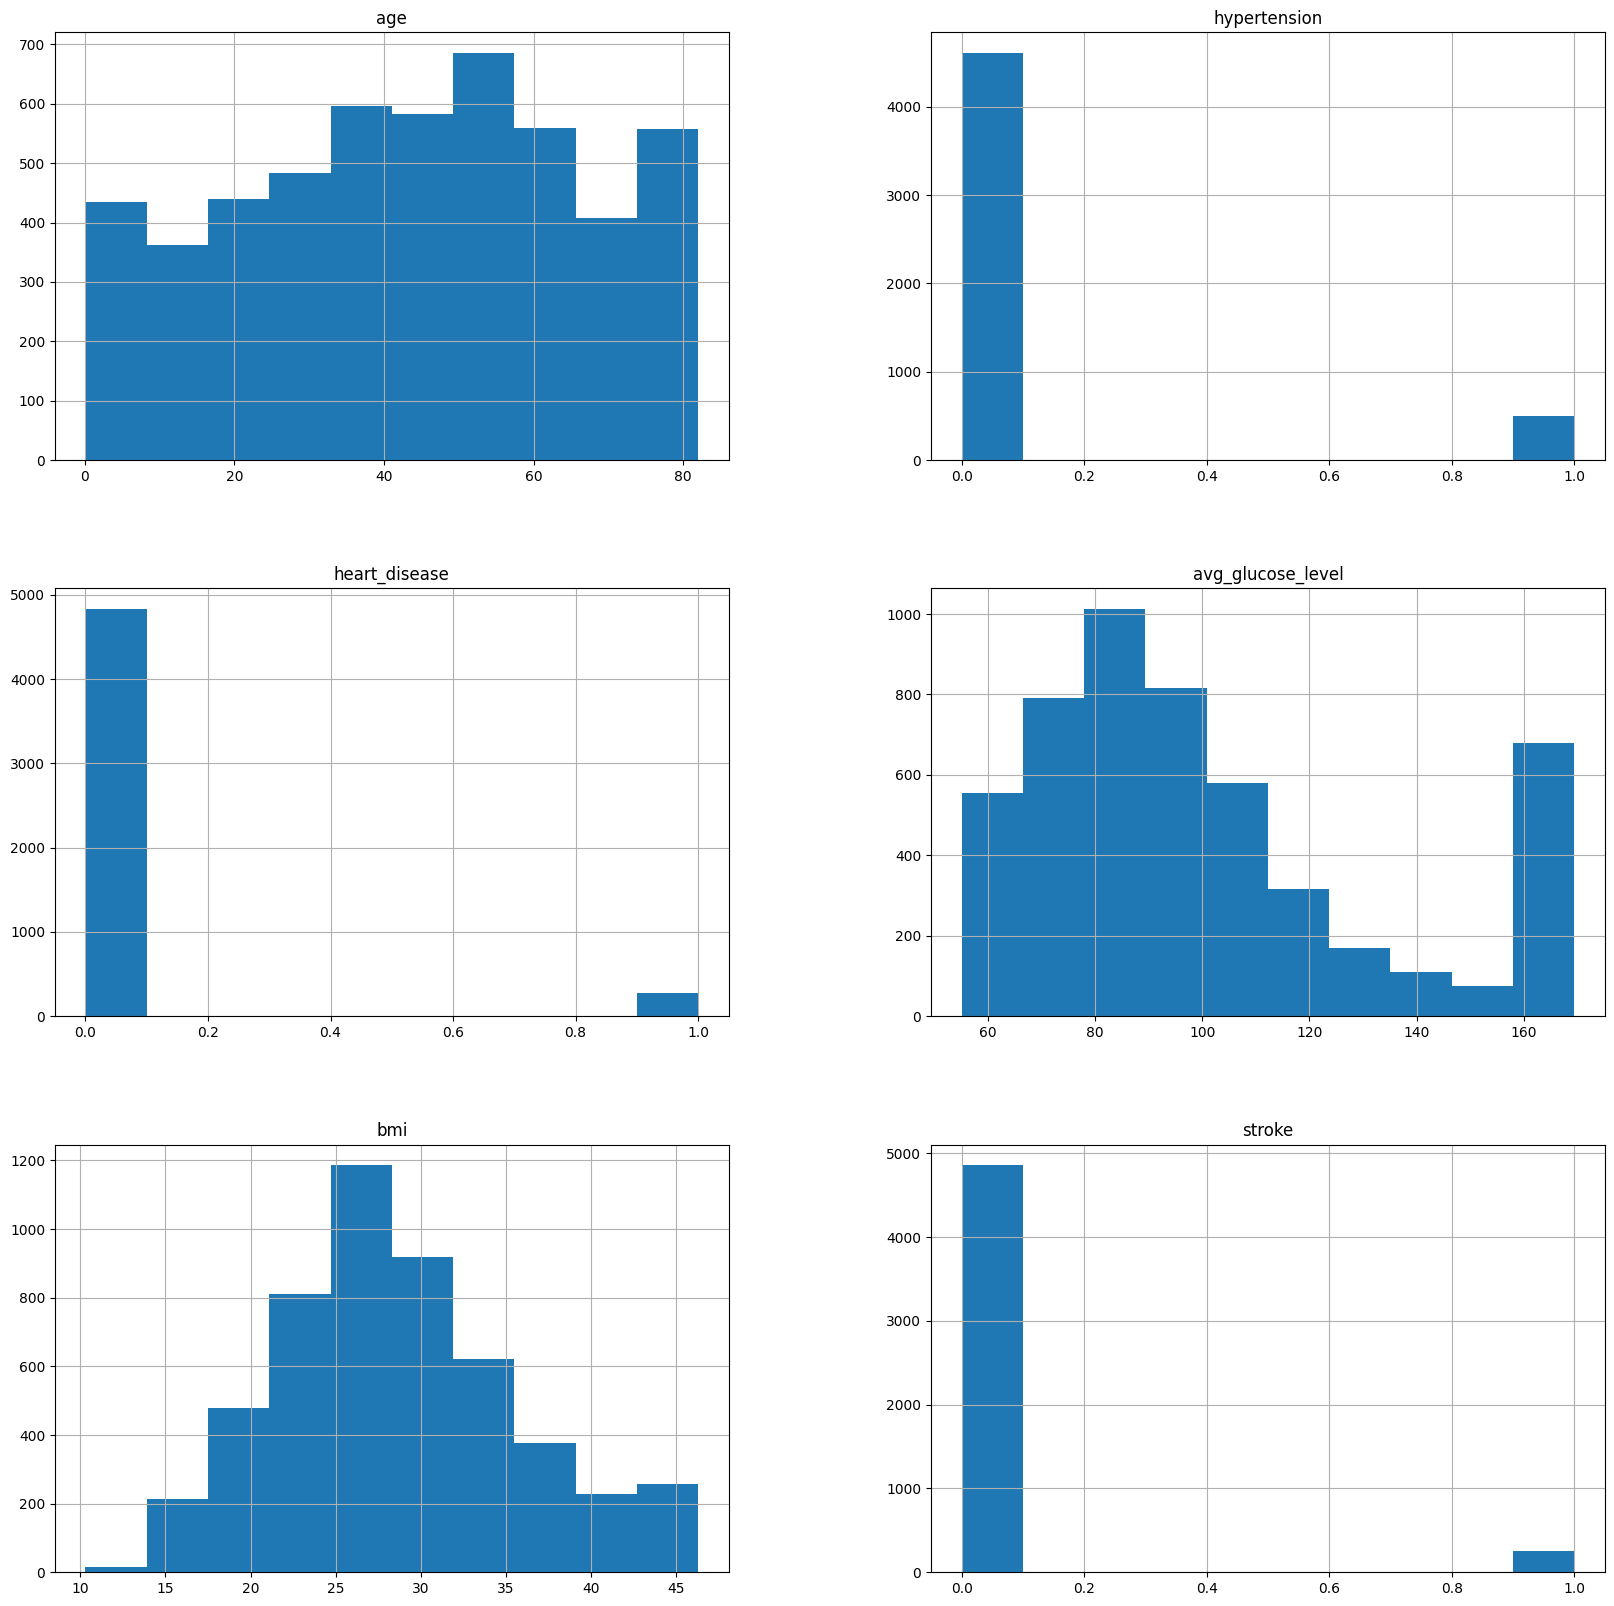

In [107]:
strokedf.hist(figsize=(20,20))

# Gender analysis

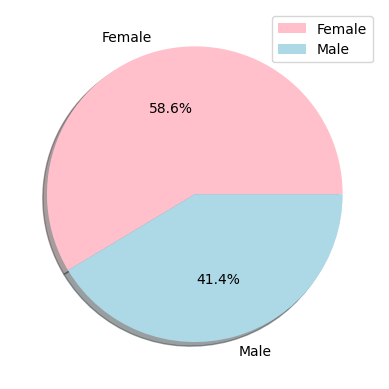

In [108]:
plt.pie(strokedf['gender'].value_counts(),labels=['Female','Male'],colors=['pink','lightblue'],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

# Gender vs Smoking

<Axes: xlabel='gender', ylabel='count'>

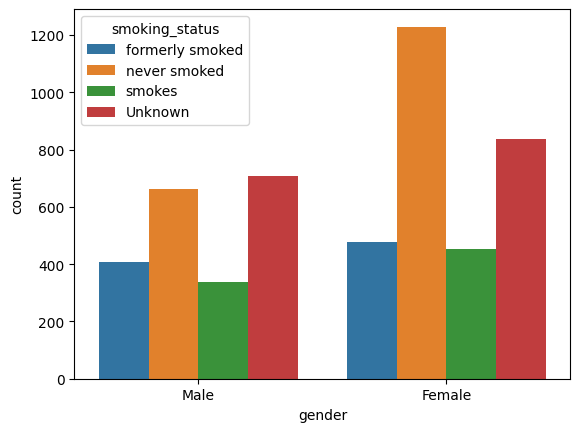

In [109]:
#Some visualization
sns.countplot(data=strokedf,x='gender',hue='smoking_status')


mostly woman is less trends towards smoking



# Heart disaese vs gender

<Axes: xlabel='heart_disease', ylabel='count'>

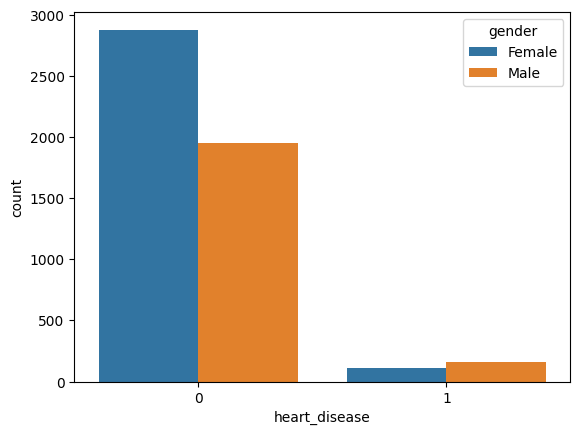

In [110]:
sns.countplot(data=strokedf,x='heart_disease',hue='gender')


Woman has less heart disease



not that imbananced but women are more in our data set

# Age Analysis

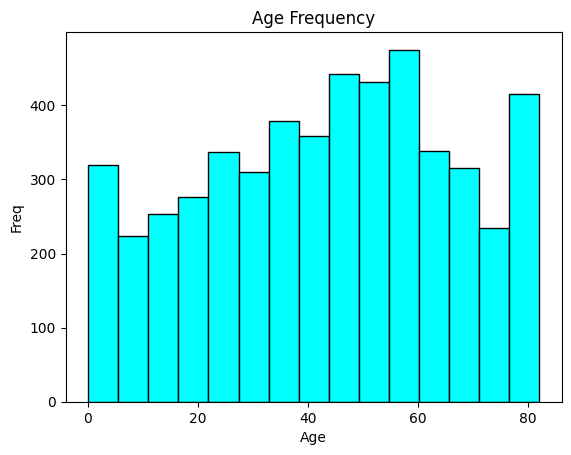

In [111]:
plt.hist(strokedf['age'],bins=15,color='cyan',edgecolor='black',linewidth=1)
plt.title('Age Frequency')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

# Hypertension Analysis


In [112]:
hyperTension_count=strokedf['hypertension'].value_counts()
hyperTension_percent=strokedf['hypertension'].value_counts(normalize=True)*100
freq_table2=pd.DataFrame({'Count':hyperTension_count,'Percentage %':hyperTension_percent})
freq_table2

,Count,Percentage %
hypertension,,
0,4611,90.252496
1,498,9.747504


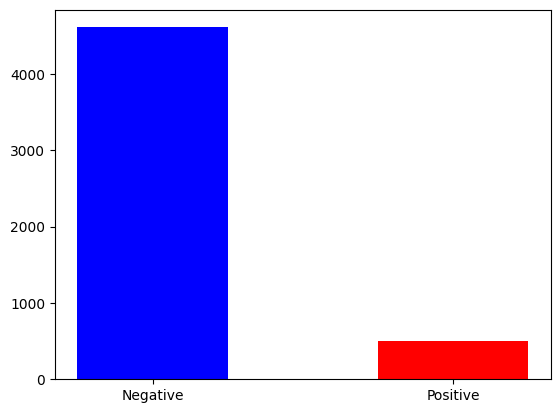

In [113]:
plt.bar(['Negative','Positive'],strokedf['hypertension'].value_counts(),align='center',width=0.5,color=['blue','red'])
plt.show()

Most of the people don't have Hyper Tension


# Heart Disease Analysis

In [114]:
heartDisease_count=strokedf['heart_disease'].value_counts()
heartDisease_percent=strokedf['heart_disease'].value_counts(normalize=True)*100
freq_table6=pd.DataFrame({'Count':heartDisease_count,'Percantage %':heartDisease_percent})
freq_table6

,Count,Percantage %
heart_disease,,
0,4833,94.597769
1,276,5.402231


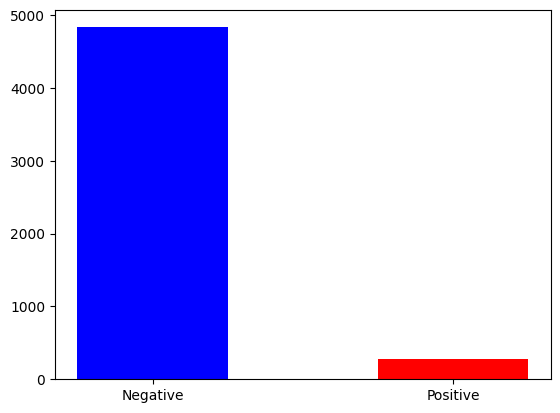

In [115]:
plt.bar(['Negative','Positive'],strokedf['heart_disease'].value_counts(),align='center',width=0.5,color=['blue','red'])
plt.show()

Most of the people don't suffer from Heart Disease


# Marriage Analysis

In [116]:
married_count=strokedf['ever_married'].value_counts()
married_percent=strokedf['ever_married'].value_counts(normalize=True)*100
freq_table3=pd.DataFrame({'Count':married_count,'Percentage %':married_percent})
freq_table3

,Count,Percentage %
ever_married,,
Yes,3353,65.629282
No,1756,34.370718


<Axes: xlabel='ever_married', ylabel='count'>

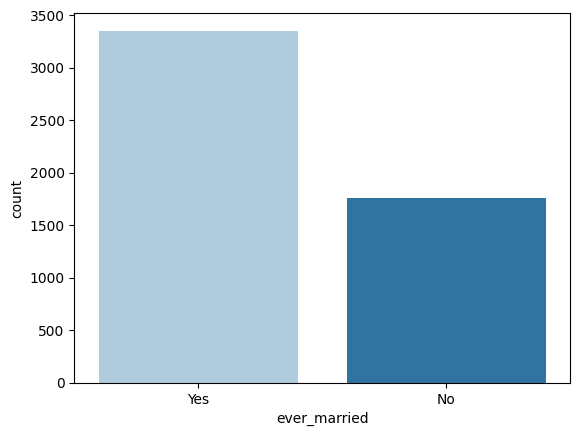

In [117]:
sns.countplot(x='ever_married',palette=sns.color_palette("Paired"),data=strokedf)

Most people are/ was married


# Work Type Analysis


In [118]:
job_count=strokedf['work_type'].value_counts()
job_percent=strokedf['work_type'].value_counts(normalize=True)*100
freq_table4=pd.DataFrame({'Count':job_count,'Percentage %':job_percent})
freq_table4

,Count,Percentage %
work_type,,
Private,2924,57.232335
Self-employed,819,16.030534
children,687,13.446858
Govt_job,657,12.859659
Never_worked,22,0.430613


<Axes: xlabel='work_type', ylabel='count'>

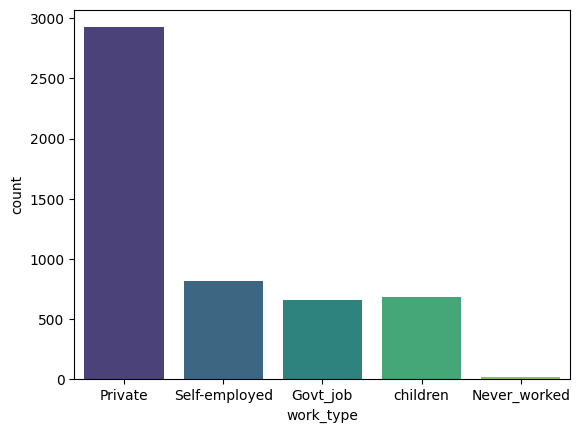

In [119]:
sns.countplot(x='work_type',palette='viridis',data=strokedf)

# Residence Type Analysis

In [120]:
Residence_type_count=strokedf['Residence_type'].value_counts()
Residence_type_percent=strokedf['Residence_type'].value_counts(normalize=True)*100
freq_table5=pd.DataFrame({'Count':Residence_type_count,'Percentage %':Residence_type_percent})
freq_table5

,Count,Percentage %
Residence_type,,
Urban,2596,50.812292
Rural,2513,49.187708


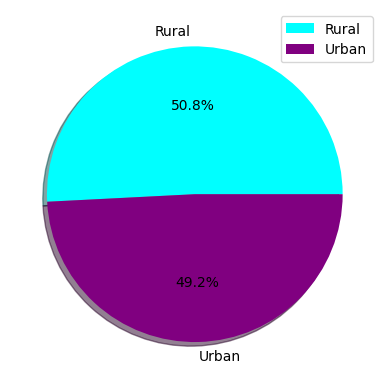

In [121]:
plt.pie(strokedf['Residence_type'].value_counts(),labels=['Rural','Urban'],colors=['cyan','purple'],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

almost equal

# Average Glucose Level Analysis


In [122]:
strokedf['avg_glucose_level'].describe()


count    5109.000000
mean      100.988838
std        33.214602
min        55.120000
25%        77.240000
50%        91.880000
75%       114.090000
max       169.365000
Name: avg_glucose_level, dtype: float64

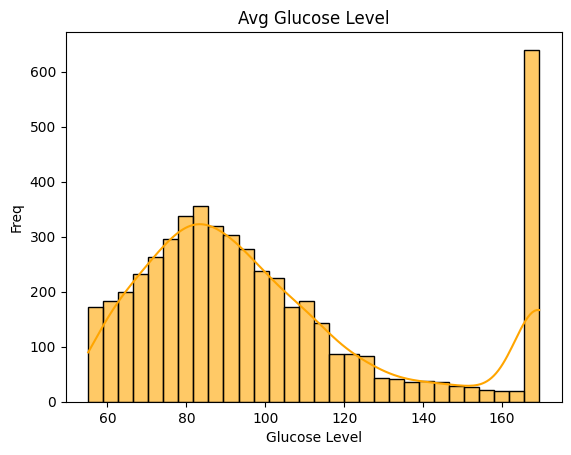

In [123]:
sns.histplot(strokedf['avg_glucose_level'],bins=30,kde=True,color='orange',edgecolor='black',linewidth=1,alpha=0.6)
plt.title('Avg Glucose Level')
plt.xlabel('Glucose Level')
plt.ylabel('Freq')
plt.show()

# BMI analysis

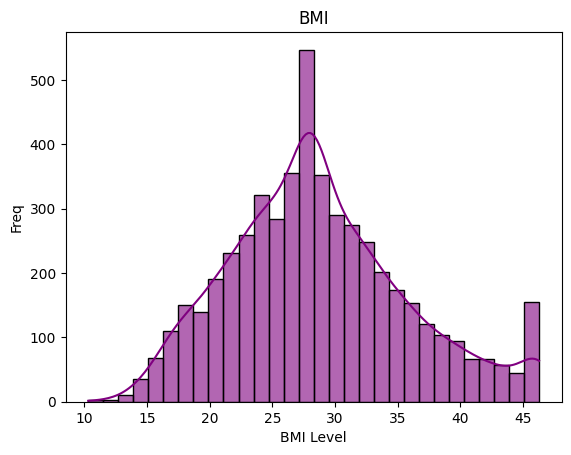

In [124]:
sns.histplot(strokedf['bmi'],bins=30,kde=True,color='purple',edgecolor='black',linewidth=1,alpha=0.6)
plt.title('BMI')
plt.xlabel('BMI Level')
plt.ylabel('Freq')
plt.show()

Underweight: BMI less than 18.5

Normal weight: BMI 18.5 to 24.9

Overweight: BMI 25 to 29.9

Obesity: BMI 30 or higher

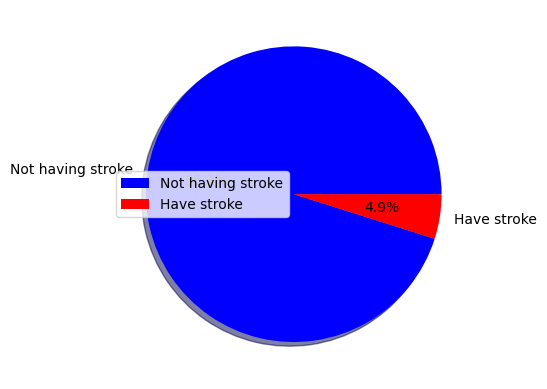

In [125]:
plt.pie(strokedf['stroke'].value_counts(),labels=['Not having stroke','Have stroke'],colors=['blue','red'],autopct='%1.1f%%',shadow=True)
plt.legend()
plt.show()

Most of the people don't suffer a stroke.

# Bivariate Analysis

Text(0.5, 1.0, 'Age vs Stroke')

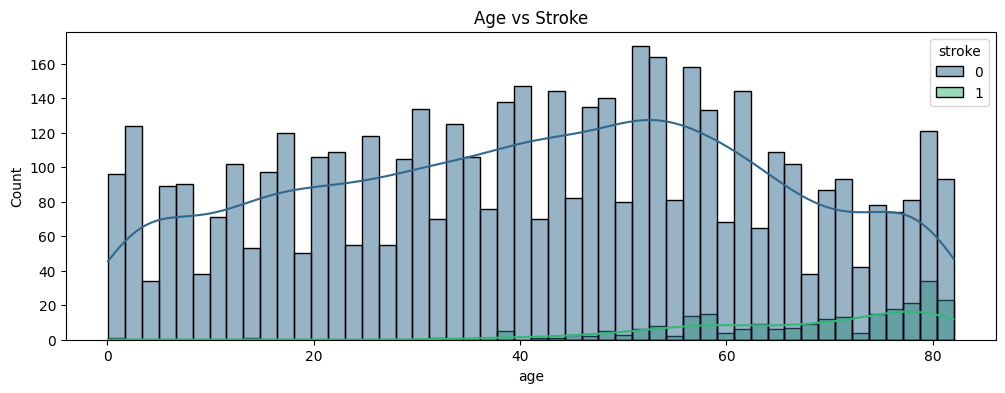

In [126]:
plt.figure(figsize=(12, 4))
pl = sns.histplot(x='age', data=strokedf, hue='stroke', bins=50, kde=True, palette='viridis')
pl.set_title('Age vs Stroke')

* Stroke incidents "gray" increase  after age 40
* The highest concentration of stroke cases appears in the 60-80 age range
* Very few stroke cases are reported in patients under 40
* The overall distribution shows age is a significant risk factor for strokes

Text(0.5, 1.0, 'Average Glucose Level vs Stroke')

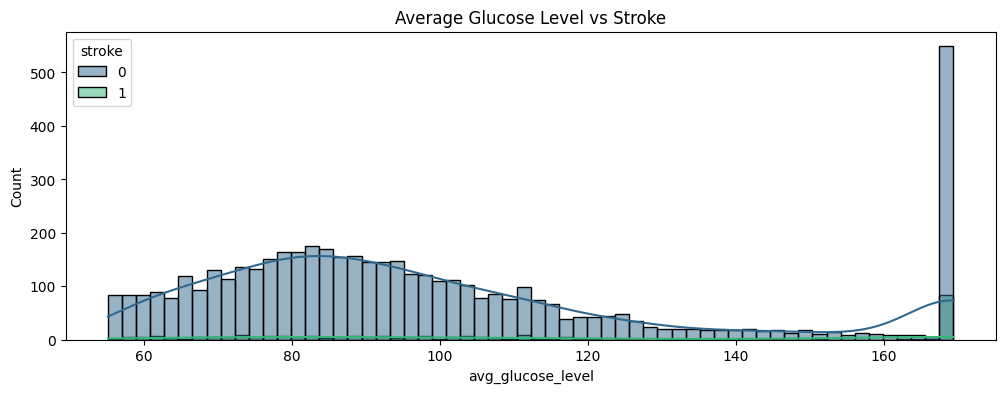

In [127]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='avg_glucose_level', data=strokedf, hue='stroke', bins=60 , kde=True, palette='viridis')
pl.set_title('Average Glucose Level vs Stroke')

* stroke not affacted by Glucose level as people have Stroke in all glucose levels 

Text(0.5, 1.0, 'Stroke vs BMI')

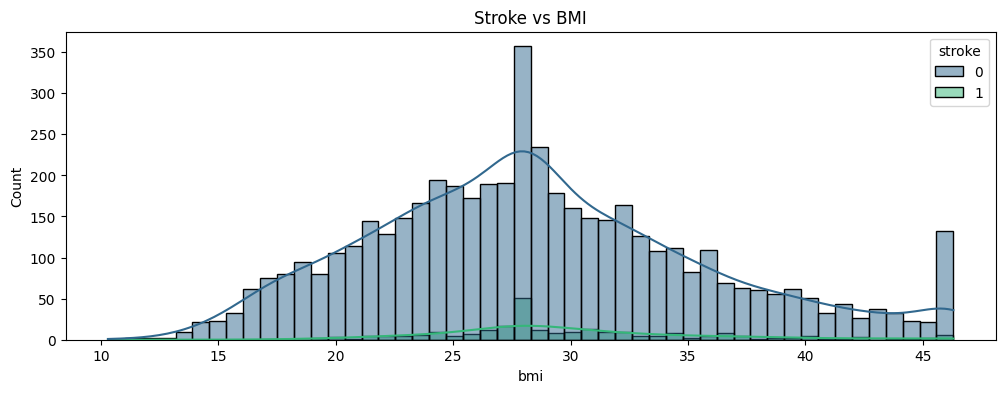

In [128]:
plt.figure(figsize=(12,4))
pl = sns.histplot(x='bmi', data=strokedf, hue='stroke', bins=50, kde=True, palette='viridis')
pl.set_title('Stroke vs BMI')

* The majority of the population has BMI between 20-40
* Stroke cases  appear more frequently in the overweight and obese ranges (BMI > 25)
* The data suggests being overweight or obese may increase stroke risk
* though the relationship appears less significant than with age or glucose levels

### Smoke state vs stroke 

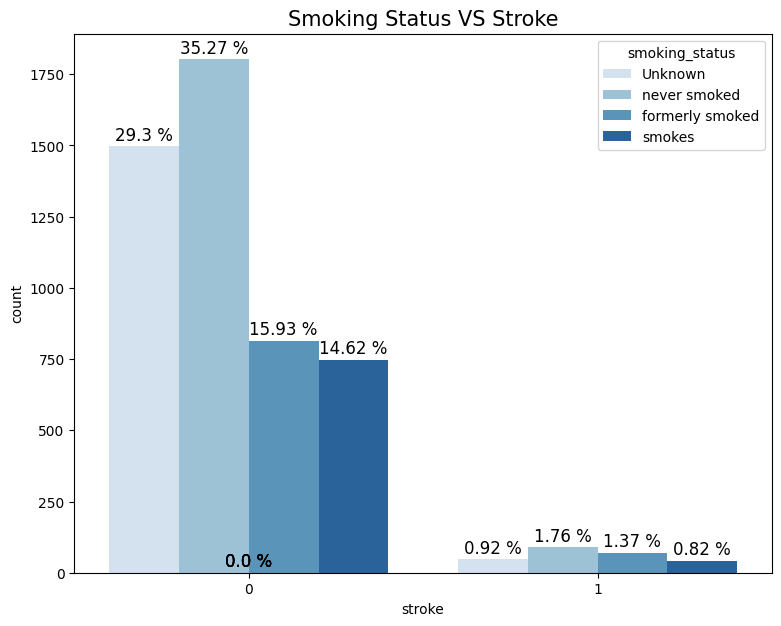

In [129]:
countplt, ax = plt.subplots(figsize = (9,7))
ax=sns.countplot(x=strokedf['stroke'],hue=strokedf['smoking_status'],palette = 'Blues',)
ax.set_title("Smoking Status VS Stroke",fontsize = 15)
for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(strokedf)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center',  va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

* The highest majority of "non-stroke" cases are among people who never smoked (35.27%) but "Surprise" current smokers have a slightly lower "stroke rate" (0.82%) compared to those who never smoked (1.76%) or formerly smoked (1.37%) 

* for me I think "this could be influenced by other factors like age distribution or sample size limitations" not logic


## Data Preprocessing 

# Encodeing data

In [130]:
print("Unique values for 'work_type':", strokedf['work_type'].unique())
print("Unique values for 'gender':", strokedf['gender'].unique())
print("Unique values for 'Residence_type':", strokedf['Residence_type'].unique())
print("Unique values for 'ever_married':", strokedf['ever_married'].unique())
print("Unique values for 'smoking_status':", strokedf['smoking_status'].unique())


Unique values for 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values for 'gender': ['Male' 'Female']
Unique values for 'Residence_type': ['Urban' 'Rural']
Unique values for 'ever_married': ['Yes' 'No']
Unique values for 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Label Encoding: for columns that have 2 values as we don't want to increasr the dimension of the data  'ever_married' 'residence_type' 'gender'


In [131]:
le = LabelEncoder()
strokedf['ever_married'] = le.fit_transform(strokedf['ever_married'])
strokedf['Residence_type'] = le.fit_transform(strokedf['Residence_type'])
strokedf['gender'] = le.fit_transform(strokedf['gender'])

 OneHotEncode to encode the rest categorical columns: work_type ,smoking_status

 because it creates separate binary columns for each category (without implying any ranking or order). avoid any inadvanced problems with algorithms

In [132]:
strokedf = pd.get_dummies(strokedf, columns=['work_type'])
strokedf = pd.get_dummies(strokedf, columns=['smoking_status'])


In [133]:
bool_columns = strokedf.select_dtypes(include='bool').columns
strokedf[bool_columns] = strokedf[bool_columns].astype(int)

In [134]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,169.365,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,169.365,28.1,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.920,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,169.365,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,169.365,24.0,1,0,0,0,1,0,0,0,1,0


# Feature Engineering

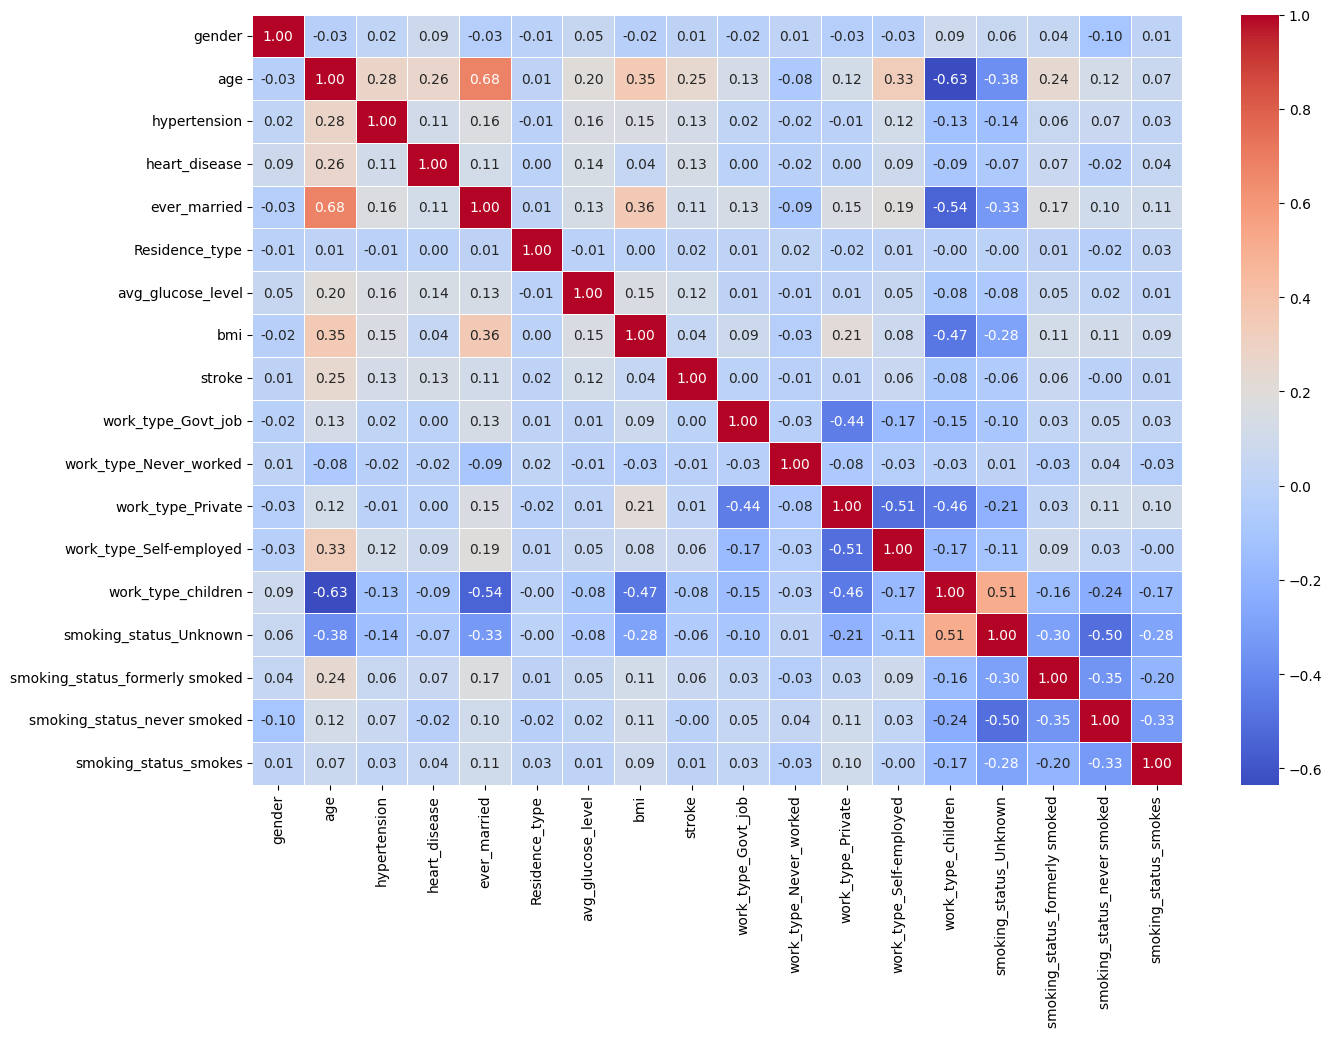

In [135]:
plt.figure(figsize=(15, 10))
sns.heatmap(strokedf.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

##### insights: 
* the most feature that affect stroke is age by 0.25
* result is normal due to imbalanced target and stroke visualization with other variables above 

* now we will use define other cateories in age and bmi to see the correlation 

In [136]:
strokedf['bmi_cat'] = strokedf['bmi'].apply(
    lambda x: 'Underweight' if x < 18.5 else
              'Normal weight' if x < 25 else
              'Overweight' if x < 30 else
              'Obesity'
)

In [137]:
strokedf['age_group'] = pd.cut(strokedf['age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])

In [138]:
strokedf = pd.get_dummies(strokedf, columns=['age_group', 'bmi_cat'])

In [139]:
bool_columns = strokedf.select_dtypes(include='bool').columns
strokedf[bool_columns] = strokedf[bool_columns].astype(int)

In [140]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,...,smoking_status_smokes,age_group_<30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60+,bmi_cat_Normal weight,bmi_cat_Obesity,bmi_cat_Overweight,bmi_cat_Underweight
0,1,67.0,0,1,1,1,169.365,36.6,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,61.0,0,0,1,0,169.365,28.1,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.920,32.5,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,49.0,0,0,1,1,169.365,34.4,1,0,...,1,0,0,1,0,0,0,1,0,0
4,0,79.0,1,0,1,0,169.365,24.0,1,0,...,0,0,0,0,0,1,1,0,0,0


#### trying decision tree 

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score

# Define features and target variable
X = strokedf.drop(columns=['stroke'])
y = strokedf['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)





In [142]:
# Evaluate the model on training data
print("Training Data Metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_train, y_train_pred))
print("\nF1 Score:")
print(f1_score(y_train, y_train_pred))
print("\nPrecision Score:")
print(precision_score(y_train, y_train_pred))

Training Data Metrics:
Confusion Matrix:
[[3900    0]
 [   0  187]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       1.00      1.00      1.00       187

    accuracy                           1.00      4087
   macro avg       1.00      1.00      1.00      4087
weighted avg       1.00      1.00      1.00      4087


Accuracy Score:
1.0

F1 Score:
1.0

Precision Score:
1.0


In [143]:
# Evaluate the model on testing data
print("\nTesting Data Metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred))
print("\nF1 Score:")
print(f1_score(y_test, y_test_pred))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_pred))


Testing Data Metrics:
Confusion Matrix:
[[915  45]
 [ 51  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.20      0.18      0.19        62

    accuracy                           0.91      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.90      0.91      0.90      1022


Accuracy Score:
0.9060665362035225

F1 Score:
0.1864406779661017

Precision Score:
0.19642857142857142


* the results explains there is overfitting in the data due to imbalanced target

* let's continue with feature engineering 

In [144]:
strokedf_test=strokedf.copy()

In [145]:
strokedf_test.drop(columns=['age', 'bmi'],inplace=True)

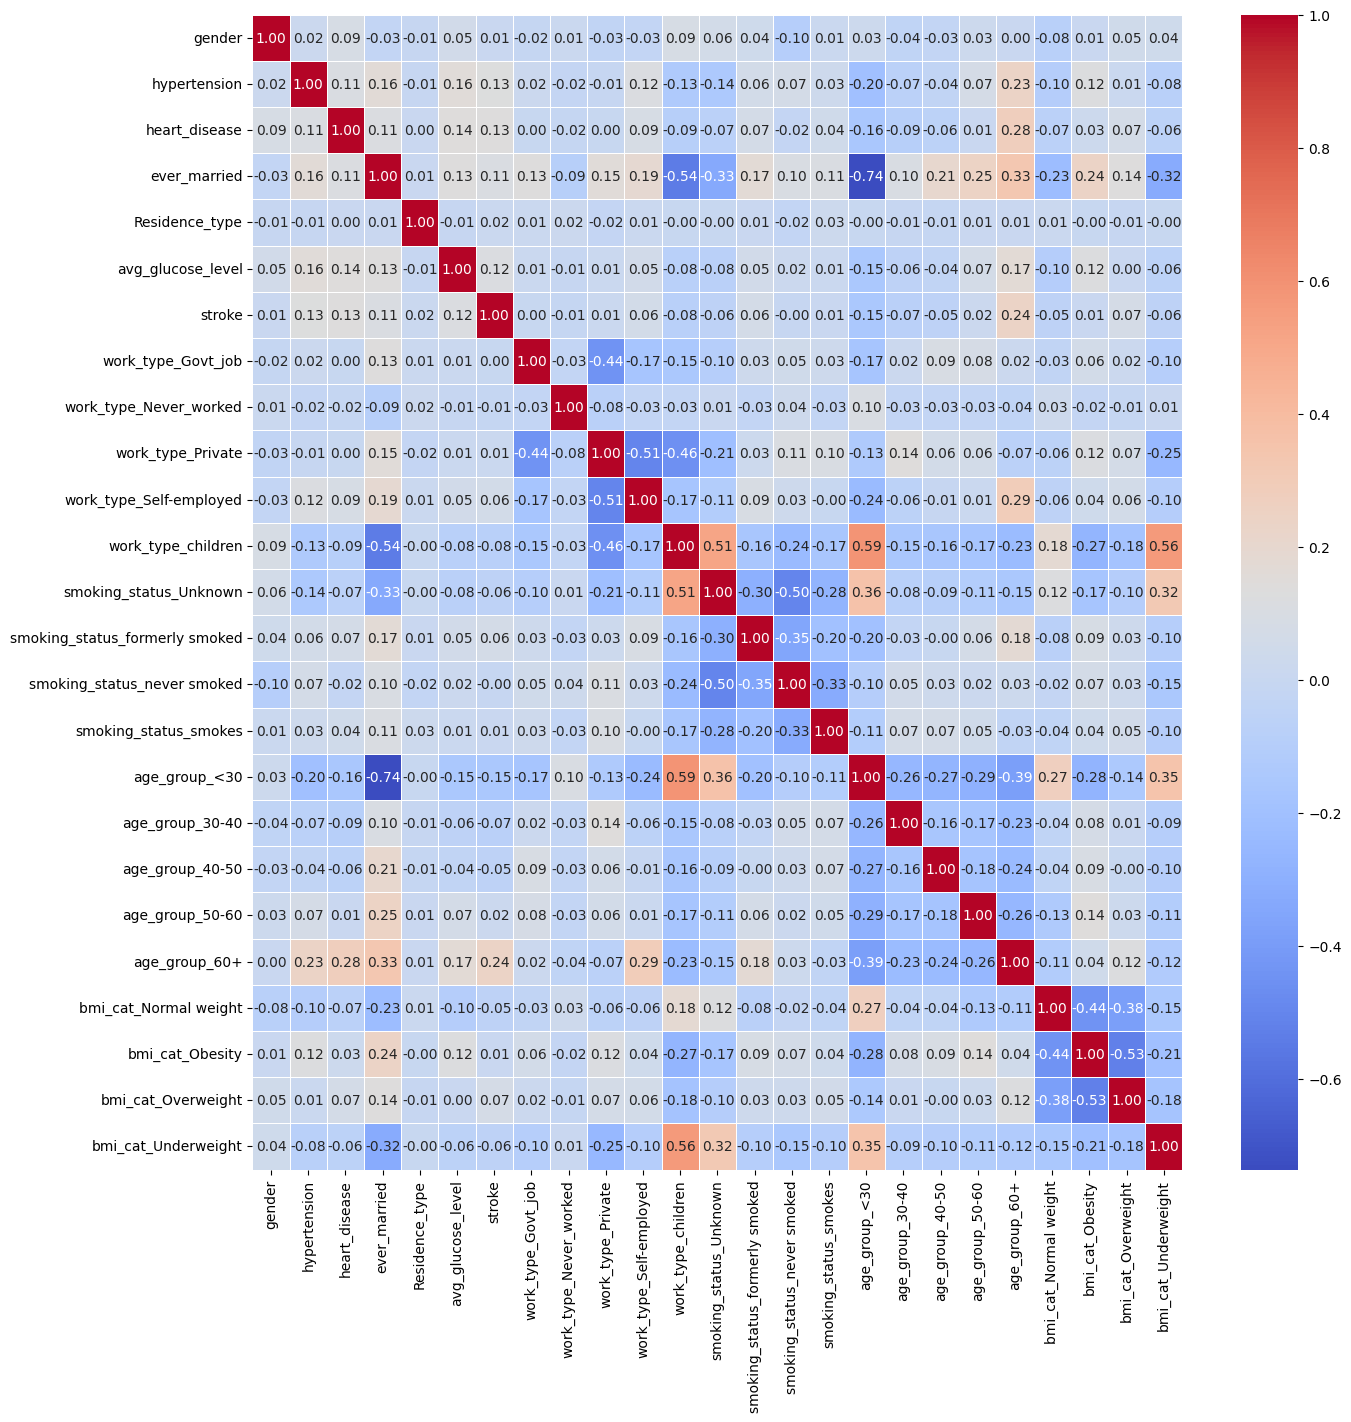

In [146]:
plt.figure(figsize=(15, 15))
sns.heatmap(strokedf_test.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [147]:
strokedf_test.corr()['stroke'].sort_values(ascending=False)

stroke                            1.000000
age_group_60+                     0.236533
heart_disease                     0.134905
hypertension                      0.127891
avg_glucose_level                 0.115731
ever_married                      0.108299
bmi_cat_Overweight                0.071485
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
age_group_50-60                   0.021981
Residence_type                    0.015415
work_type_Private                 0.011927
gender                            0.009081
smoking_status_smokes             0.008920
bmi_cat_Obesity                   0.008303
work_type_Govt_job                0.002660
smoking_status_never smoked      -0.004163
work_type_Never_worked           -0.014885
bmi_cat_Normal weight            -0.054107
age_group_40-50                  -0.054316
smoking_status_Unknown           -0.055924
bmi_cat_Underweight              -0.056489
age_group_30-40                  -0.072123
work_type_c

* as expected, age_group above 60 have high chance to get stroke
* other features like hypertension, avg_glucose_level and heart_disease have nearby correlation with stroke  

* to avoid multicolinearity and complexsity, we will reduce number of columns
* we will use age and BMI as a numeric features instead of categorical groups.

In [148]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,...,smoking_status_smokes,age_group_<30,age_group_30-40,age_group_40-50,age_group_50-60,age_group_60+,bmi_cat_Normal weight,bmi_cat_Obesity,bmi_cat_Overweight,bmi_cat_Underweight
0,1,67.0,0,1,1,1,169.365,36.6,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,61.0,0,0,1,0,169.365,28.1,1,0,...,0,0,0,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.920,32.5,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,49.0,0,0,1,1,169.365,34.4,1,0,...,1,0,0,1,0,0,0,1,0,0
4,0,79.0,1,0,1,0,169.365,24.0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [149]:
strokedf.drop(columns=['age_group_<30', 'bmi_cat_Underweight','age_group_30-40','age_group_40-50','age_group_50-60','age_group_60+','bmi_cat_Overweight','bmi_cat_Normal weight','bmi_cat_Obesity'],inplace=True)

In [150]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,169.365,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,169.365,28.1,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.920,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,169.365,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,169.365,24.0,1,0,0,0,1,0,0,0,1,0


* as we see, most of extracted columns as correlated with each other than the target, so we will use a combined feature called "Health_risk_score" 

# Feature Selection

#### Insights:

#### Stroke Correlations:

##### Stroke has weak positive correlations with most features

* Age has the strongest correlation with stroke (0.25)



##### features with Stronger Correlation with the Target (stroke):

* age

* hypertension

* heart_disease

* avg_glucose_level

* bmi

##### These features may add some value to the model but aren't as strong:

* ever_married

* smoking_status_formerly smoked

* work_type (consider One-Hot Encoding for categorical values while excluding work_type_children).

##### Features to Drop:

* gender: Minimal correlation with stroke.
* residence_type: No significant impact.

* work_type_children: Avoid due to high negative correlation with age. "Multicollinearity"

* smoking_status_never smoked and smoking_status_smokes: Very weak correlation.


after normalizarion to make agood feature we will think of create  "Health Risk Score" feature

In [151]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
strokedf[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(strokedf[['age', 'avg_glucose_level', 'bmi']])

# Update smoking risk calculation
strokedf['smoking_risk'] = (
    strokedf['smoking_status_smokes'] * 0.9 +
    strokedf['smoking_status_formerly smoked'] * 0.7 +
    strokedf['smoking_status_never smoked'] * -0.2 +  # Give a small negative weight for a protective effect
    strokedf['smoking_status_Unknown'] * 0.5
)

In [152]:
strokedf['Chronic_Conditions_Score'] = strokedf['hypertension'] + strokedf['heart_disease']

In [153]:
weights = {
    'age': 0.4,  # Increased as it's a strong predictor
    'Chronic_Conditions_Score': 0.2,
    'avg_glucose_level': 0.2,
    'bmi': 0.1,
    'smoking_risk': 0.1
}

#work type, ever married

strokedf['Health_Risk_Score'] = (
    weights['age'] * strokedf['age'] +
    weights['Chronic_Conditions_Score'] * strokedf['Chronic_Conditions_Score'] +
    weights['avg_glucose_level'] * strokedf['avg_glucose_level'] +
    weights['bmi'] * strokedf['bmi'] +
    weights['smoking_risk'] * strokedf['smoking_risk']
)

In [154]:
strokedf.drop(columns=['smoking_status_smokes', 'smoking_status_formerly smoked', 
                       'smoking_status_never smoked', 'smoking_status_Unknown'], inplace=True)

In [155]:
strokedf.corr()['stroke'].sort_values(ascending=False)

stroke                      1.000000
Health_Risk_Score           0.256586
age                         0.245239
Chronic_Conditions_Score    0.174602
heart_disease               0.134905
hypertension                0.127891
avg_glucose_level           0.115731
ever_married                0.108299
work_type_Self-employed     0.062150
bmi                         0.042664
smoking_risk                0.017572
Residence_type              0.015415
work_type_Private           0.011927
gender                      0.009081
work_type_Govt_job          0.002660
work_type_Never_worked     -0.014885
work_type_children         -0.083888
Name: stroke, dtype: float64

* health risk score is the most correlated feature with target

In [156]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_risk,Chronic_Conditions_Score,Health_Risk_Score
0,1,0.816895,0,1,1,1,1.000000,0.730556,1,0,0,1,0,0,0.7,1,0.869813
1,0,0.743652,0,0,1,0,1.000000,0.494444,1,0,0,0,1,0,-0.2,0,0.526905
2,1,0.975586,0,1,1,0,0.444658,0.616667,1,0,0,1,0,0,-0.2,1,0.720833
3,0,0.597168,0,0,1,1,1.000000,0.669444,1,0,0,1,0,0,0.9,0,0.595812
4,0,0.963379,1,0,1,0,1.000000,0.380556,1,0,0,0,1,0,-0.2,1,0.803407


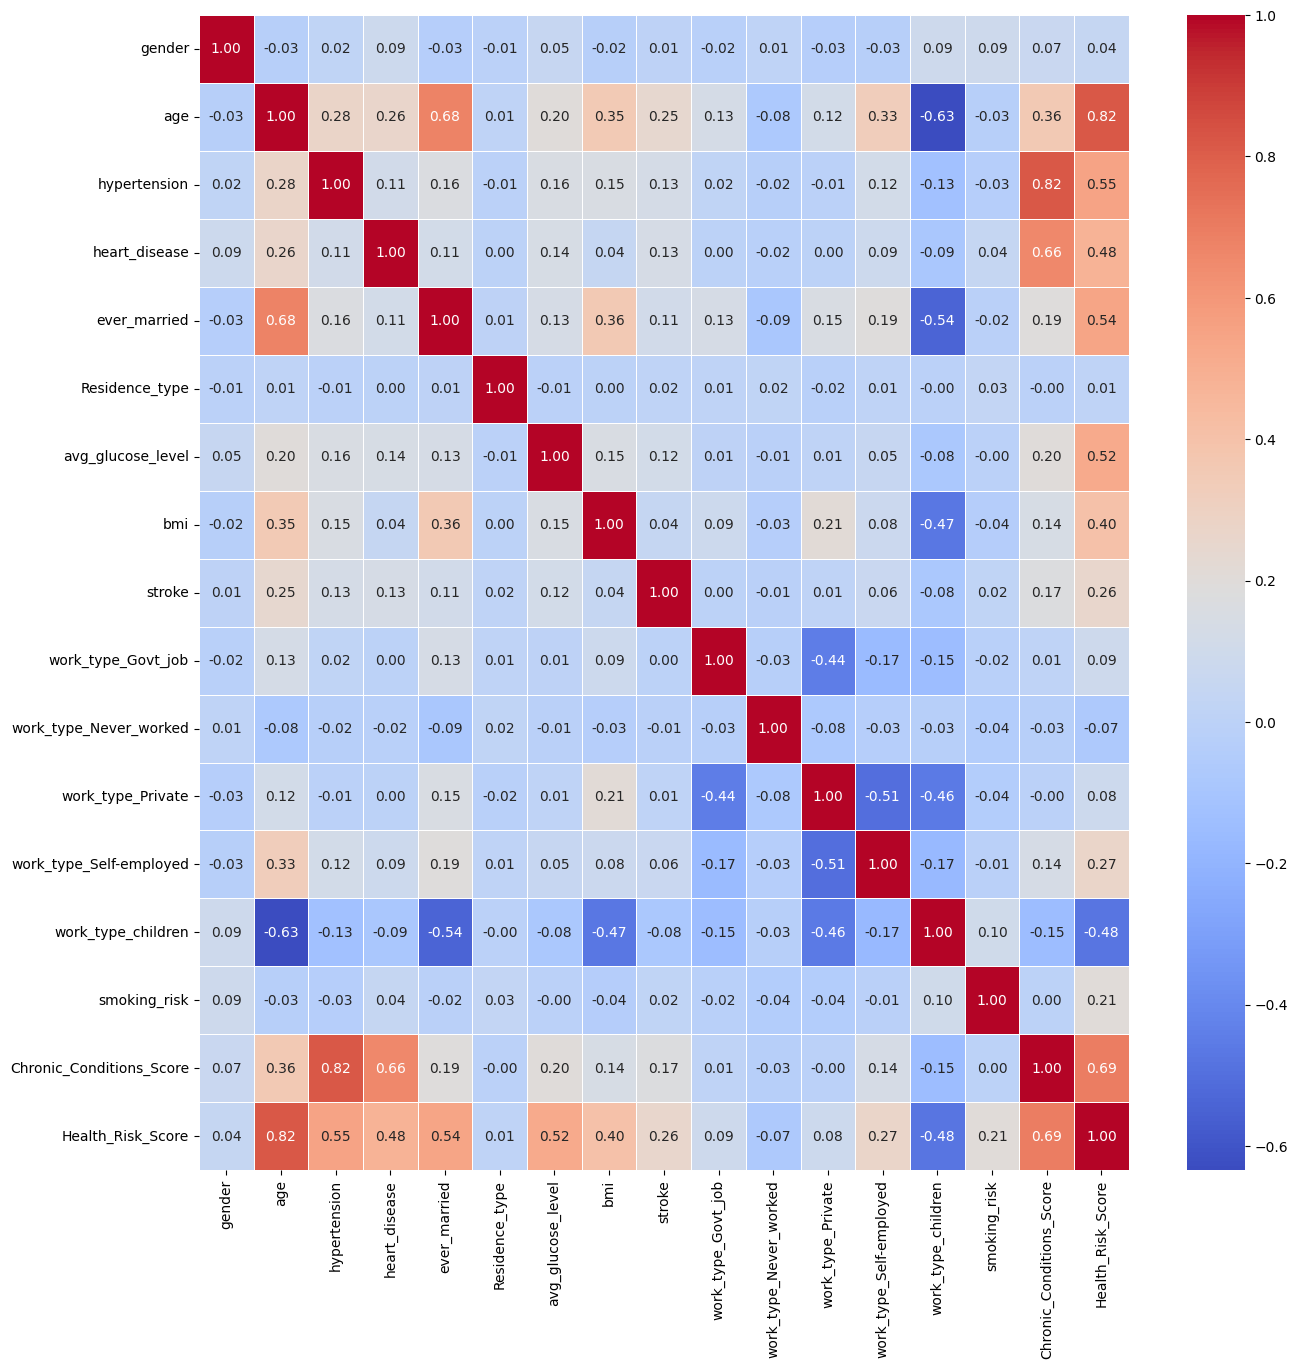

In [157]:
plt.figure(figsize=(15, 15))
sns.heatmap(strokedf.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

#### let's preform model again

In [158]:
# Define features and target variable
X = strokedf.drop(columns=['stroke'])
y = strokedf['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)


In [159]:
# Evaluate the model on training data
print("Training Data Metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_train, y_train_pred))
print("\nF1 Score:")
print(f1_score(y_train, y_train_pred))
print("\nPrecision Score:")
print(precision_score(y_train, y_train_pred))

Training Data Metrics:
Confusion Matrix:
[[3900    0]
 [   0  187]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       1.00      1.00      1.00       187

    accuracy                           1.00      4087
   macro avg       1.00      1.00      1.00      4087
weighted avg       1.00      1.00      1.00      4087


Accuracy Score:
1.0

F1 Score:
1.0

Precision Score:
1.0


In [160]:
# Evaluate the model on testing data
print("\nTesting Data Metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred))
print("\nF1 Score:")
print(f1_score(y_test, y_test_pred))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_pred))


Testing Data Metrics:
Confusion Matrix:
[[908  52]
 [ 52  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.16      0.16      0.16        62

    accuracy                           0.90      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.90      0.90      0.90      1022


Accuracy Score:
0.898238747553816

F1 Score:
0.16129032258064516

Precision Score:
0.16129032258064516


* we still face the problem of overfitting, so we still had to use oversampling technique 

# Exploring need for oversampling as "Imbalanced data"

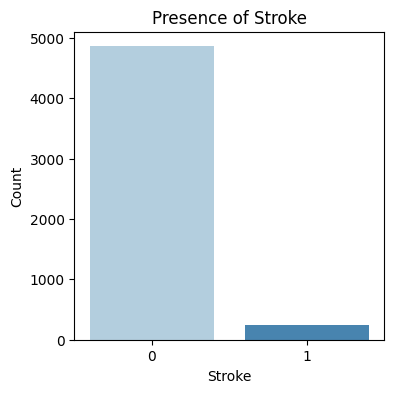

In [161]:
plt.figure(figsize=(4, 4))
sns.countplot(x='stroke', data=strokedf, palette="Blues")
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title("Presence of Stroke")
plt.show()

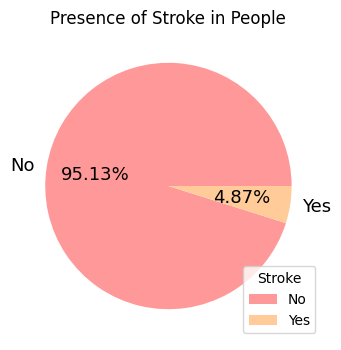

In [162]:
#or
plt.figure(figsize=(4, 4))
stroke_counts = strokedf['stroke'].value_counts()
labels = ['No', 'Yes']  # 0 = No Stroke, 1 = Stroke
colors = ['#ff9999', '#ffcc99']
textprops = {"fontsize": 13}

plt.pie(stroke_counts, labels=labels, autopct='%1.2f%%', colors=colors, textprops=textprops)
plt.title('Presence of Stroke in People')
plt.legend(title="Stroke")
plt.show()

The number of positive cases is 249
The number of negative cases is  4861 WE NEED TO! Oversampling using SMOTE AS EXAMPLE

# Handling Class Imbalance by Oversampling

One of the major challenges we faced was the class imbalance in the target variable, 'stroke'. The distribution before handling the imbalance was heavily skewed towards class 0 (no stroke), with 4860 samples of class 0 and only 249 samples of class 1 (stroke). This imbalance could result in our model being biased towards predicting the majority class.

To handle this imbalance, we used SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class. After applying SMOTE, the class distribution became balanced, with 4860 samples for both classes (stroke and no stroke). This should help the model learn to identify stroke cases better and prevent it from being biased towards the majority class.

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [164]:
strokedf.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_risk,Chronic_Conditions_Score,Health_Risk_Score
0,1,0.816895,0,1,1,1,1.000000,0.730556,1,0,0,1,0,0,0.7,1,0.869813
1,0,0.743652,0,0,1,0,1.000000,0.494444,1,0,0,0,1,0,-0.2,0,0.526905
2,1,0.975586,0,1,1,0,0.444658,0.616667,1,0,0,1,0,0,-0.2,1,0.720833
3,0,0.597168,0,0,1,1,1.000000,0.669444,1,0,0,1,0,0,0.9,0,0.595812
4,0,0.963379,1,0,1,0,1.000000,0.380556,1,0,0,0,1,0,-0.2,1,0.803407


In [165]:
# X = strokedf.drop('stroke', axis=1)  # Features
# y = strokedf['stroke']  # Target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [166]:
# numerical_columns = ['age', 'avg_glucose_level', 'bmi', 'Health_Risk_Score']

In [167]:
# scaler = StandardScaler()
# X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
# X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# oversampled_data = pd.concat([X_train, y_train], axis=1).copy()

# # num_samples = y_train.value_counts()[0] - y_train.value_counts()[1]

In [168]:
# new_samples = oversampled_data.query("stroke == 1").sample(num_samples, replace=True, random_state=42)
# oversampled_data = pd.concat([oversampled_data, new_samples], axis=0).sample(frac=1.0, random_state=42).reset_index(drop=True)

In [169]:
# y_train_oversampled = oversampled_data['stroke']
# X_train_oversampled = oversampled_data.drop('stroke', axis=1)

In [170]:
# print("Target class distribution after handling imbalance:")
# print(y_train_oversampled.value_counts())

* this result can cause overfitting as the two classes become equal

#### preforming decision tree after oversampling

In [171]:
# Initialize and train the decision tree classifier with oversampled data
# clf_oversampled = DecisionTreeClassifier(random_state=42)
# clf_oversampled.fit(X_train_oversampled, y_train_oversampled)

# # Make predictions on the training and testing data
# y_train_oversampled_pred = clf_oversampled.predict(X_train_oversampled)
# y_test_oversampled_pred = clf_oversampled.predict(X_test_scaled)




In [172]:
# # Evaluate the model on the oversampled training data
# print("Oversampled Training Data Metrics:")
# print("Confusion Matrix:")
# print(confusion_matrix(y_train_oversampled, y_train_oversampled_pred))
# print("\nClassification Report:")
# print(classification_report(y_train_oversampled, y_train_oversampled_pred))
# print("\nAccuracy Score:")
# print(accuracy_score(y_train_oversampled, y_train_oversampled_pred))
# print("\nF1 Score:")
# print(f1_score(y_train_oversampled, y_train_oversampled_pred))
# print("\nPrecision Score:")
# print(precision_score(y_train_oversampled, y_train_oversampled_pred))

In [173]:
# # Evaluate the model on the testing data
# print("\nTesting Data Metrics with Oversampled Model:")
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_test_oversampled_pred))
# print("\nClassification Report:")
# print(classification_report(y_test, y_test_oversampled_pred))
# print("\nAccuracy Score:")
# print(accuracy_score(y_test, y_test_oversampled_pred))
# print("\nF1 Score:")
# print(f1_score(y_test, y_test_oversampled_pred))
# print("\nPrecision Score:")
# print(precision_score(y_test, y_test_oversampled_pred))

* we need to use another way for oversampling to make more balance by SMOTETomek

In [174]:
from imblearn.combine import SMOTETomek
from collections import Counter

# Combine oversampling with undersampling
smote_tomek = SMOTETomek(sampling_strategy=0.5, random_state=42)  # Target ratio: 1:2
X_train_oversampled, y_train_oversampled = smote_tomek.fit_resample(X, y)

# Check new distribution
print(f"New class distribution: {Counter(y_train_oversampled)}")


New class distribution: Counter({0: 4780, 1: 2350})


* resampling all data to become 5110 rows only

In [175]:
import pandas as pd
from sklearn.utils import resample

# Combine X_resampled and y_resampled for resampling
df_resampled = pd.concat([pd.DataFrame(X_train_oversampled), pd.Series(y_train_oversampled, name='stroke')], axis=1)

# Downsample to the original dataset size
df_resampled = resample(df_resampled, replace=False, n_samples=5110, random_state=42)

# Split into features and target
X_train_oversampled = df_resampled.drop(columns=['stroke'])
y_train_oversampled = df_resampled['stroke']


In [176]:
y_train_oversampled.value_counts()

stroke
0    3421
1    1689
Name: count, dtype: int64

In [177]:
X_train_oversampled

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_risk,Chronic_Conditions_Score,Health_Risk_Score
6950,0,0.623229,0,0,1,0,0.410965,0.579386,0,0,1,0,0,0.884868,0,0.477910
2177,1,0.584961,1,0,1,1,1.000000,0.438889,0,0,1,0,0,-0.200000,1,0.657873
927,1,0.206543,0,0,0,1,0.508819,0.363889,0,1,0,0,0,-0.200000,0,0.200770
4332,0,0.584961,0,0,1,1,0.467329,0.638889,0,0,0,1,0,0.500000,0,0.441339
5313,0,0.544947,1,0,1,0,0.094706,0.674175,0,0,1,0,0,0.795962,1,0.583934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5332,0,0.984114,1,0,1,1,1.000000,0.372488,0,0,0,1,0,0.034243,1,0.834319
6943,1,0.853041,0,0,1,0,0.198125,0.597503,0,0,1,0,0,0.087600,0,0.449352
3811,0,0.340820,0,1,1,0,0.491488,0.244444,0,0,1,0,0,0.900000,1,0.549070
1273,0,0.035645,0,0,0,0,0.371832,0.430556,0,0,0,0,1,0.500000,0,0.181680


In [178]:
y_train_oversampled

6950    1
2177    0
927     0
4332    0
5313    1
       ..
5332    1
6943    1
3811    0
1273    0
4703    0
Name: stroke, Length: 5110, dtype: int64

#### preforming decision tree again

In [179]:
clf = DecisionTreeClassifier(
    max_depth=10,  
    min_samples_split=10,  
    min_samples_leaf=5,   
    random_state=42)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.2, random_state=42)
# Train the classifier on the oversampled training data
clf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_best_pred = clf.predict(X_train)
y_test_best_pred_dt = clf.predict(X_test)

In [181]:
from sklearn.metrics import recall_score


In [182]:
print("Training Data Metrics with Best Parameters:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_best_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_best_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_train, y_train_best_pred))
print("\nF1 Score:")
print(f1_score(y_train, y_train_best_pred))
print("\nPrecision Score:")
print(precision_score(y_train, y_train_best_pred))
print("\nRecall Score:")
print(precision_score(y_train, y_train_best_pred))

Training Data Metrics with Best Parameters:
Confusion Matrix:
[[2461  265]
 [ 148 1214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2726
           1       0.82      0.89      0.85      1362

    accuracy                           0.90      4088
   macro avg       0.88      0.90      0.89      4088
weighted avg       0.90      0.90      0.90      4088


Accuracy Score:
0.898972602739726

F1 Score:
0.8546286518831397

Precision Score:
0.8208248816768087

Recall Score:
0.8208248816768087


In [183]:
# Evaluate the model on the testing data


print("\nTesting Data Metrics with Best Parameters:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_best_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_test_best_pred_dt))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_best_pred_dt))
print("\nF1 Score:")
print(f1_score(y_test, y_test_best_pred_dt))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_best_pred_dt))
print("\nRecall Score:")
print(recall_score(y_train, y_train_best_pred))


Testing Data Metrics with Best Parameters:
Confusion Matrix:
[[608  87]
 [ 52 275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90       695
           1       0.76      0.84      0.80       327

    accuracy                           0.86      1022
   macro avg       0.84      0.86      0.85      1022
weighted avg       0.87      0.86      0.87      1022


Accuracy Score:
0.8639921722113503

F1 Score:
0.7982583454281568

Precision Score:
0.7596685082872928

Recall Score:
0.8913362701908958


#### preforming gridsearch to get the best parameters

In [184]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [185]:
dt = DecisionTreeClassifier(random_state=42)


In [186]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)


In [187]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [188]:
best_params_dt = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params_dt)
print("Best Score:", best_score)
best_params_dt

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.83409825468649


{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

#### preforming cross validation to get best precision

In [189]:
best_clf = DecisionTreeClassifier(
   **best_params_dt,    # Minimum samples per leaf
    random_state=42)

In [190]:
# Train the classifier on the oversampled training data
best_clf.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_best_pred = best_clf.predict(X_train)
y_test_best_pred_dt = best_clf.predict(X_test)

In [191]:


print("Training Data Metrics with Best Parameters:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_best_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_best_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_train, y_train_best_pred))
print("\nF1 Score:")
print(f1_score(y_train, y_train_best_pred))
print("\nPrecision Score:")
print(precision_score(y_train, y_train_best_pred))
print("\nRecall Score:")
print(recall_score(y_train, y_train_best_pred))

Training Data Metrics with Best Parameters:
Confusion Matrix:
[[2723    3]
 [   8 1354]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2726
           1       1.00      0.99      1.00      1362

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088


Accuracy Score:
0.9973091976516634

F1 Score:
0.9959543949981611

Precision Score:
0.997789240972734

Recall Score:
0.9941262848751835


In [192]:
# Evaluate the model on the testing data

print("\nTesting Data Metrics with Best Parameters:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_best_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_test_best_pred_dt))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_best_pred_dt))
print("\nF1 Score:")
print(f1_score(y_test, y_test_best_pred_dt))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_best_pred_dt))
print("\nRecall Score:")
print(recall_score(y_test, y_test_best_pred_dt))


Testing Data Metrics with Best Parameters:
Confusion Matrix:
[[629  66]
 [ 56 271]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       695
           1       0.80      0.83      0.82       327

    accuracy                           0.88      1022
   macro avg       0.86      0.87      0.86      1022
weighted avg       0.88      0.88      0.88      1022


Accuracy Score:
0.8806262230919765

F1 Score:
0.8162650602409639

Precision Score:
0.8041543026706232

Recall Score:
0.8287461773700305


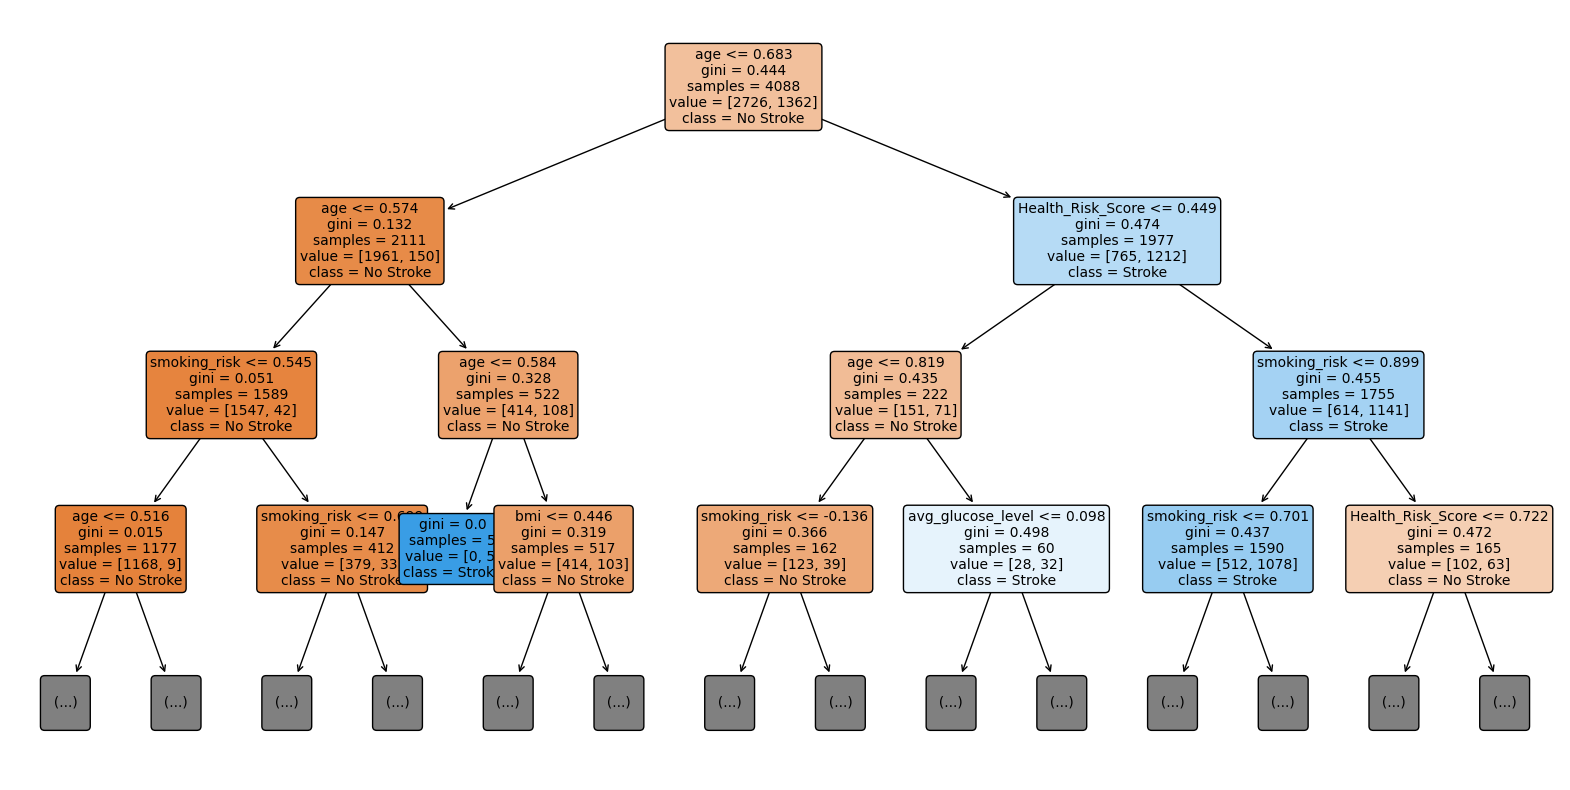

In [233]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(20, 10))  # Set the size of the plot (you can adjust the size)
plot_tree(best_clf, 
          feature_names=X_train.columns,  # Replace with your feature names
          class_names=['No Stroke', 'Stroke'],  # Replace with your class labels
          filled=True, 
          rounded=True, 
          fontsize=10, 
          max_depth=3)  # Adjust the font size and limit the depth to minimize leafs
plt.show()


### support vector machine

In [194]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Initialize SVC models with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma=0.1)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale')

# Train the models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [195]:
# Make predictions on the training set
y_pred_linear_train = svm_linear.predict(X_train)
y_pred_rbf_train = svm_rbf.predict(X_train)
y_pred_poly_train = svm_poly.predict(X_train)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)


In [196]:
# Define a function to print the metrics for each kernel and dataset
def print_metrics(name, dataset, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred, average='binary')
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    print(f"\n{name} Metrics ({dataset}):")
    print(f"\tAccuracy: {accuracy:.3f}%")
    print(f"\tF1-Score: {f1:.5f}")
    print(f"\tPrecision: {precision:.5f}")
    print(f"\tRecall: {recall:.5f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

In [197]:
print_metrics("Linear Kernel", "Train", y_train, y_pred_linear_train)
print_metrics("Linear Kernel", "Test", y_test, y_pred_linear)





Linear Kernel Metrics (Train):
	Accuracy: 79.990%
	F1-Score: 0.71538
	Precision: 0.67989
	Recall: 0.75477
Confusion Matrix:
[[2242  484]
 [ 334 1028]]

Linear Kernel Metrics (Test):
	Accuracy: 80.822%
	F1-Score: 0.72394
	Precision: 0.67102
	Recall: 0.78593
Confusion Matrix:
[[569 126]
 [ 70 257]]


In [198]:
# Print metrics for the RBF kernel
print_metrics("RBF Kernel", "Train", y_train, y_pred_rbf_train)
print_metrics("RBF Kernel", "Test", y_test, y_pred_rbf)


RBF Kernel Metrics (Train):
	Accuracy: 80.993%
	F1-Score: 0.72339
	Precision: 0.70214
	Recall: 0.74596
Confusion Matrix:
[[2295  431]
 [ 346 1016]]

RBF Kernel Metrics (Test):
	Accuracy: 81.605%
	F1-Score: 0.72832
	Precision: 0.69041
	Recall: 0.77064
Confusion Matrix:
[[582 113]
 [ 75 252]]


In [199]:
print_metrics("Polynomial Kernel", "Train", y_train, y_pred_poly_train)
print_metrics("Polynomial Kernel", "Test", y_test, y_pred_poly)


Polynomial Kernel Metrics (Train):
	Accuracy: 83.782%
	F1-Score: 0.75544
	Precision: 0.75908
	Recall: 0.75184
Confusion Matrix:
[[2401  325]
 [ 338 1024]]

Polynomial Kernel Metrics (Test):
	Accuracy: 82.583%
	F1-Score: 0.72866
	Precision: 0.72644
	Recall: 0.73089
Confusion Matrix:
[[605  90]
 [ 88 239]]


In [200]:
param_grid = {
    'C': [0.1, 1, 10,],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly'],
}

In [201]:
svm = SVC()


In [202]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='recall')

In [203]:
best_params_svm = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params_svm)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Score: 0.842900237017884


In [204]:
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# Make predictions on the test set
y_test_best_svm_pred = best_svm.predict(X_test)


In [205]:
print("\nTesting Data Metrics with Best SVM Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_best_svm_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_best_svm_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_best_svm_pred))
print("\nF1 Score:")
print(f1_score(y_test, y_test_best_svm_pred))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_best_svm_pred))
print("\nRecall Score:")
print(recall_score(y_test, y_test_best_svm_pred))


Testing Data Metrics with Best SVM Model:
Confusion Matrix:
[[613  82]
 [ 56 271]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       695
           1       0.77      0.83      0.80       327

    accuracy                           0.86      1022
   macro avg       0.84      0.86      0.85      1022
weighted avg       0.87      0.86      0.87      1022


Accuracy Score:
0.8649706457925636

F1 Score:
0.7970588235294118

Precision Score:
0.7677053824362606

Recall Score:
0.8287461773700305


### KNN with cross validation

In [206]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [207]:
# Initialize the KNN classifier
knn = KNeighborsClassifier()

In [208]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [209]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.9214393449687567


In [210]:
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_test_best_knn_pred = best_knn.predict(X_test)

In [211]:
# Evaluate the model on the testing data
print("\nTesting Data Metrics with Best KNN Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_best_knn_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_best_knn_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_best_knn_pred))
print("\nF1 Score:")
print(f1_score(y_test, y_test_best_knn_pred))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_best_knn_pred))
print("\nrecall Score:")
print(recall_score(y_test, y_test_best_knn_pred))


Testing Data Metrics with Best KNN Model:
Confusion Matrix:
[[607  88]
 [ 29 298]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       695
           1       0.77      0.91      0.84       327

    accuracy                           0.89      1022
   macro avg       0.86      0.89      0.87      1022
weighted avg       0.90      0.89      0.89      1022


Accuracy Score:
0.8855185909980431

F1 Score:
0.8359046283309958

Precision Score:
0.772020725388601

recall Score:
0.9113149847094801


### Naive bayse with cross validation bestscore

In [212]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='recall')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.99632353 0.996337   1.         1.         0.98897059]
Mean cross-validation score: 0.996326222796811


In [213]:
nb_classifier.fit(X_train, y_train)
y_test_best_nb_pred = nb_classifier.predict(X_test)

In [214]:
print("\nTesting Data Metrics with Best KNN Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_best_nb_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_best_nb_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_best_nb_pred))
print("\nF1 Score:")
print(f1_score(y_test, y_test_best_nb_pred))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_best_nb_pred))
print("\nrecall Score:")
print(recall_score(y_test, y_test_best_nb_pred))


Testing Data Metrics with Best KNN Model:
Confusion Matrix:
[[226 469]
 [  1 326]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.49       695
           1       0.41      1.00      0.58       327

    accuracy                           0.54      1022
   macro avg       0.70      0.66      0.54      1022
weighted avg       0.81      0.54      0.52      1022


Accuracy Score:
0.5401174168297456

F1 Score:
0.5811051693404634

Precision Score:
0.410062893081761

recall Score:
0.9969418960244648


### Logistic regression

In [215]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [216]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [217]:
# Make predictions on the training set
y_train_pred = log_reg.predict(X_train)

# Make predictions on the test set
y_test_pred_lg = log_reg.predict(X_test)

In [218]:
# Evaluate the model on the training data
print("Training Data Metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_train, y_train_pred))
print("\nF1 Score:")
print(f1_score(y_train, y_train_pred))
print("\nPrecision Score:")
print(precision_score(y_train, y_train_pred))
print("\nRecall Score:")
print(recall_score(y_train, y_train_pred))

Training Data Metrics:
Confusion Matrix:
[[2309  417]
 [ 432  930]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2726
           1       0.69      0.68      0.69      1362

    accuracy                           0.79      4088
   macro avg       0.77      0.76      0.77      4088
weighted avg       0.79      0.79      0.79      4088


Accuracy Score:
0.7923189823874756

F1 Score:
0.6866002214839424

Precision Score:
0.6904231625835189

Recall Score:
0.6828193832599119


In [219]:
# Evaluate the model on the testing data
print("\nTesting Data Metrics:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lg))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_lg))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_pred_lg))
print("\nF1 Score:")
print(f1_score(y_test, y_test_pred_lg))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_pred_lg))
print("\nRecall Score:")
print(recall_score(y_test, y_test_pred_lg))


Testing Data Metrics:
Confusion Matrix:
[[580 115]
 [ 95 232]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       695
           1       0.67      0.71      0.69       327

    accuracy                           0.79      1022
   macro avg       0.76      0.77      0.77      1022
weighted avg       0.80      0.79      0.80      1022


Accuracy Score:
0.7945205479452054

F1 Score:
0.6884272997032641

Precision Score:
0.6685878962536023

Recall Score:
0.709480122324159


In [220]:


# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Initialize the grid search
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params_log_reg = grid_search.best_params_
best_score_log_reg = grid_search.best_score_

print("Best Parameters:", best_params_log_reg)
print("Best Score:", best_score_log_reg)
# Evaluate the model on the testing data with the best parameters
y_test_best_log_reg_pred = grid_search.predict(X_test)



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.6820809092867917


In [221]:
print("\nTesting Data Metrics with Best Logistic Regression Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_best_log_reg_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_best_log_reg_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_test_best_log_reg_pred))
print("\nF1 Score:")
print(f1_score(y_test, y_test_best_log_reg_pred))
print("\nPrecision Score:")
print(precision_score(y_test, y_test_best_log_reg_pred))
print("\nRecall Score:")
print(recall_score(y_test, y_test_best_log_reg_pred))


Testing Data Metrics with Best Logistic Regression Model:
Confusion Matrix:
[[580 115]
 [ 94 233]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       695
           1       0.67      0.71      0.69       327

    accuracy                           0.80      1022
   macro avg       0.77      0.77      0.77      1022
weighted avg       0.80      0.80      0.80      1022


Accuracy Score:
0.7954990215264188

F1 Score:
0.6903703703703704

Precision Score:
0.6695402298850575

Recall Score:
0.7125382262996942


### ROC- curve

In [222]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
# Initialize the models with best parameters
best_knn = grid_search.best_estimator_
best_nb = nb_classifier
best_log_reg = log_reg
best_dt = best_clf
best_svm = best_svm

In [223]:
# Fit the models
best_knn.fit(X_train, y_train)
best_nb.fit(X_train, y_train)
best_log_reg.fit(X_train, y_train)
best_dt.fit(X_train, y_train)
best_svm.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [224]:
# Predict probabilities
y_test_knn_prob = best_knn.predict_proba(X_test)[:, 1]
y_test_nb_prob = best_nb.predict_proba(X_test)[:, 1]
y_test_log_reg_prob = best_log_reg.predict_proba(X_test)[:, 1]
y_test_dt_prob = best_dt.predict_proba(X_test)[:, 1]
y_test_svm_prob = best_svm.decision_function(X_test)

In [225]:

# Compute ROC curve and ROC area for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_knn_prob)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_test_nb_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_test_log_reg_prob)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_dt_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_test_svm_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)


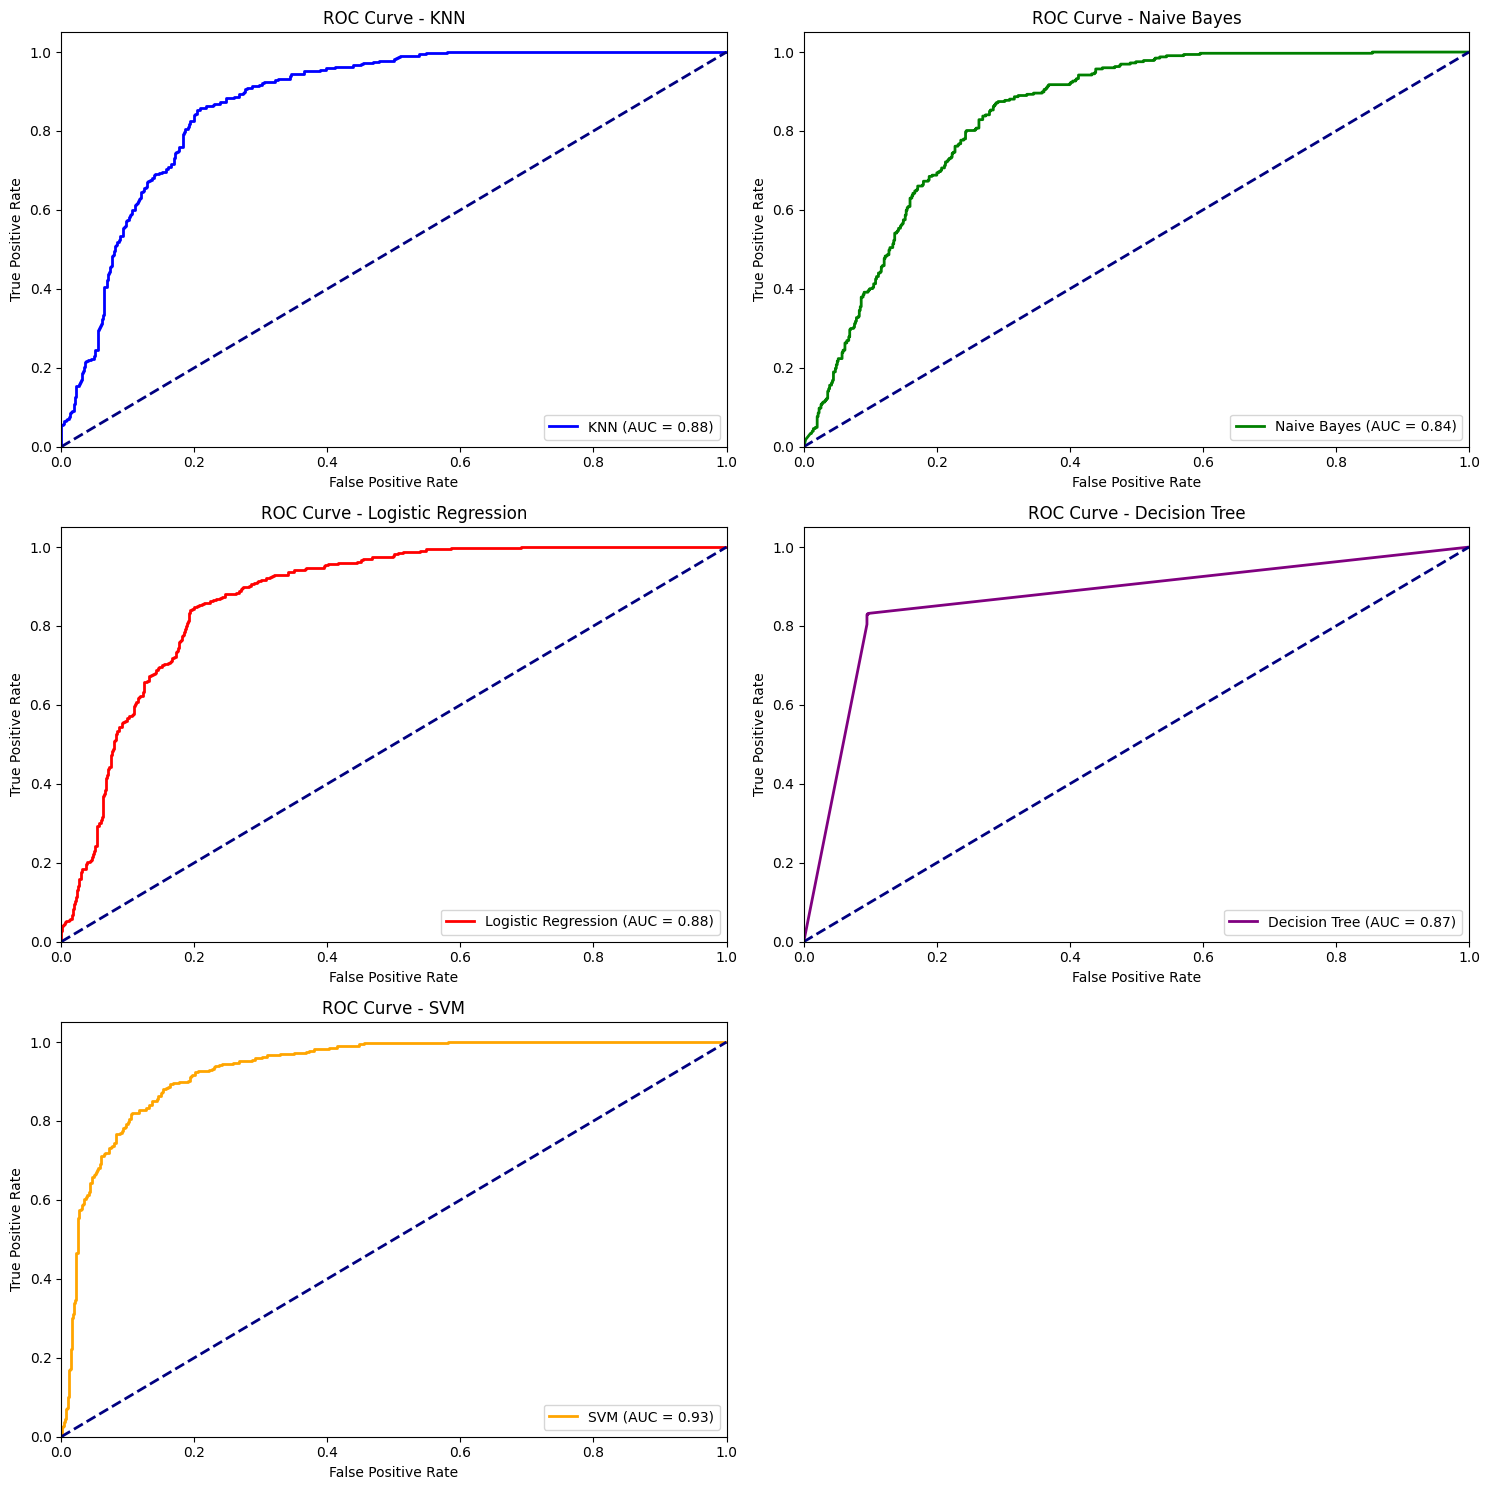

In [226]:
# Plot ROC curves for each model in separate graphs
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# KNN
axs[0, 0].plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - KNN')
axs[0, 0].legend(loc="lower right")

# Naive Bayes
axs[0, 1].plot(fpr_nb, tpr_nb, color='green', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - Naive Bayes')
axs[0, 1].legend(loc="lower right")

# Logistic Regression
axs[1, 0].plot(fpr_log_reg, tpr_log_reg, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - Logistic Regression')
axs[1, 0].legend(loc="lower right")

# Decision Tree
axs[1, 1].plot(fpr_dt, tpr_dt, color='purple', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - Decision Tree')
axs[1, 1].legend(loc="lower right")

# SVM
axs[2, 0].plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
axs[2, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[2, 0].set_xlim([0.0, 1.0])
axs[2, 0].set_ylim([0.0, 1.05])
axs[2, 0].set_xlabel('False Positive Rate')
axs[2, 0].set_ylabel('True Positive Rate')
axs[2, 0].set_title('ROC Curve - SVM')
axs[2, 0].legend(loc="lower right")

# Hide the empty subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

In [236]:
import pandas as pd

# Create a dictionary with the model names and their corresponding best scores
best_scores = {
    'Model': ['Decision Tree', 'SVM', 'KNN', 'Naive Bayes', 'Logistic Regression'],
    'F1 Score': [
        f1_score(y_test, y_test_best_pred_dt),
        f1_score(y_test, y_test_best_svm_pred),
        f1_score(y_test, y_test_best_knn_pred),
        f1_score(y_test, y_test_best_nb_pred),
        f1_score(y_test, y_test_best_log_reg_pred)
    ],
    'Precision': [
        precision_score(y_test, y_test_best_pred_dt),
        precision_score(y_test, y_test_best_svm_pred),
        precision_score(y_test, y_test_best_knn_pred),
        precision_score(y_test, y_test_best_nb_pred),
        precision_score(y_test, y_test_best_log_reg_pred)
    ],
    'Recall': [
        recall_score(y_test, y_test_best_pred_dt),
        recall_score(y_test, y_test_best_svm_pred),
        recall_score(y_test, y_test_best_knn_pred),
        recall_score(y_test, y_test_best_nb_pred),
        recall_score(y_test, y_test_best_log_reg_pred)
    ], 'accuracy':[
        accuracy_score(y_test, y_test_best_pred_dt),
        accuracy_score(y_test, y_test_best_svm_pred),
        accuracy_score(y_test, y_test_best_knn_pred),
        accuracy_score(y_test, y_test_best_nb_pred),
        accuracy_score(y_test, y_test_best_log_reg_pred)
    ]
}

# Convert the dictionary to a DataFrame
best_scores_df = pd.DataFrame(best_scores)



In [237]:
# Display the DataFrame
best_scores_df.sort_values(by='Recall', ascending=False)

,Model,F1 Score,Precision,Recall,accuracy
3,Naive Bayes,0.581105,0.410063,0.996942,0.540117
2,KNN,0.835905,0.772021,0.911315,0.885519
0,Decision Tree,0.816265,0.804154,0.828746,0.880626
1,SVM,0.797059,0.767705,0.828746,0.864971
4,Logistic Regression,0.690370,0.669540,0.712538,0.795499


In [229]:
#comparison of models

Accuracy: KNN shows the highest accuracy (0.835905), followed by Decision Tree (0.816265), SVM (0.797059), and Naive Bayes (0.581105).
Precision: Decision Tree has the highest precision (0.804154), closely followed by KNN (0.772021) and SVM (0.767705). Naive Bayes significantly lags (0.410063).
Recall: Naive Bayes excels in recall (0.996942), while KNN (0.911315), Decision Tree (0.828746), and SVM (0.828746) perform well but fall short of Naive Bayes.

Strengths and Weaknesses:
Naive Bayes:

Strengths:
Simple and fast to train, especially with large datasets.
High recall suggests it captures most of the true positives effectively.
Weaknesses:
Low precision indicates it produces many false positives.
Lower accuracy reflects suboptimal overall performance for this dataset.
KNN:

Strengths:
High accuracy and recall indicate it generalizes well.
Suitable for datasets where decision boundaries are complex.
Weaknesses:
Computationally expensive during prediction due to distance calculations.
Performance depends heavily on hyperparameters like 
k
k and scaling of features.
Decision Tree:

Strengths:
High precision and recall, indicating balanced performance.
Easily interpretable and can model complex decision boundaries.
Weaknesses:
Prone to overfitting, especially if not pruned.
Performance can degrade with noisy data.
SVM:

Strengths:
Good balance between precision and recall, with robust accuracy.
Effective for datasets with clear margins of separation.
Weaknesses:
Sensitive to the choice of kernel and hyperparameters.
Computationally intensive for large datasets.

Insights and Recommendations:

Best Algorithm: KNN demonstrates the highest accuracy and recall, suggesting it performs best at achieving the prediction objective. However, its high computational cost should be considered if scalability is a concern.
Dataset Context: If the objective emphasizes minimizing false negatives (e.g., for critical safety or medical applications), Naive Bayes may be preferred due to its high recall. However, its overall performance is weaker.
Balanced Performance: Decision Tree offers a robust and interpretable alternative, providing a balance between precision and recall with slightly lower accuracy than KNN.
Scalability and Margin Separation: SVM may be ideal for datasets with well-defined margins, especially if computational resources are sufficient to optimize kernel parameters.
Ultimately, the choice of algorithm depends on the specific requirements of the prediction task, such as prioritizing accuracy, interpretability, or computational efficiency.

In [230]:
X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_risk,Chronic_Conditions_Score,Health_Risk_Score
1554,1,0.743652,0,0,1,0,0.303120,0.419444,0,0,1,0,0,-0.200000,0,0.380029
2497,1,0.670410,0,0,1,1,0.256641,0.561111,0,0,1,0,0,0.700000,0,0.445603
287,1,0.328613,0,0,1,0,0.415948,0.447222,0,0,1,0,0,0.900000,0,0.349357
5557,1,0.774144,0,1,1,1,0.353335,0.593397,0,0,0,0,0,0.600431,1,0.699707
3289,1,0.279785,0,0,0,0,0.110639,0.436111,0,0,1,0,0,-0.200000,0,0.157653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,0,0.414062,0,0,1,0,0.344173,0.663889,0,0,1,0,0,0.500000,0,0.350848
1168,0,0.401855,0,0,0,1,0.578319,0.327778,0,0,1,0,0,-0.200000,0,0.289184
5758,1,0.929538,0,0,1,1,0.986663,0.502401,0,0,1,0,0,0.563650,0,0.675753
6969,1,0.611261,0,0,0,0,0.410243,0.619241,0,0,1,0,0,0.842276,0,0.472705


In [235]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_test and best_knn are already defined and trained

# Define the feature columns
feature_columns = X_test.columns

# Initialize the scaler and fit it on the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Function to preprocess the input data
def preprocess_input(data):
    df = pd.DataFrame(data, index=[0])
    df_scaled = scaler.transform(df)
    return df_scaled

# Function to make predictions
def predict():
    input_data = {}
    for col in feature_columns:
        input_data[col] = float(entries[col].get())
    input_data_scaled = preprocess_input(input_data)
    prediction = best_knn.predict(input_data_scaled)
    result.set(f"Prediction: {'Stroke' if prediction[0] == 1 else 'No Stroke'}")

# Create the main window
root = tk.Tk()
root.title("Stroke Prediction using KNN")

# Create a frame for the input fields
frame = ttk.Frame(root, padding="10")
frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

# Create input fields for each feature
entries = {}
for i, col in enumerate(feature_columns):
    ttk.Label(frame, text=col).grid(row=i, column=0, sticky=tk.W)
    entry = ttk.Entry(frame, width=20)
    entry.grid(row=i, column=1, sticky=(tk.W, tk.E))
    entries[col] = entry

# Create a button to make predictions
ttk.Button(frame, text="Predict", command=predict).grid(row=len(feature_columns), column=0, columnspan=2)

# Create a label to display the result
result = tk.StringVar()
ttk.Label(frame, textvariable=result).grid(row=len(feature_columns) + 1, column=0, columnspan=2)

# Run the application
root.mainloop()
# Function to preprocess the input data with label encoding
def preprocess_input(data):
    df = pd.DataFrame(data, index=[0])
    for col in df.columns:
        if col in label_encoders:
            df[col] = label_encoders[col].transform(df[col])
    df_scaled = scaler.transform(df)
    return df_scaled

# Create label encoders for categorical features
label_encoders = {}
categorical_features = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(X_train[feature])
    label_encoders[feature] = le

# Update the predict function to handle label encoding
def predict():
    input_data = {}
    for col in feature_columns:
        input_data[col] = entries[col].get()
    input_data_scaled = preprocess_input(input_data)
    prediction = best_knn.predict(input_data_scaled)
    result.set(f"Prediction: {'Stroke' if prediction[0] == 1 else 'No Stroke'}")
    # Function to handle drag and drop
    def on_drag(event):
        widget = event.widget
        widget.startX = event.x
        widget.startY = event.y

    def on_drop(event):
        widget = event.widget
        x = widget.winfo_x() - widget.startX + event.x
        y = widget.winfo_y() - widget.startY + event.y
        widget.place(x=x, y=y)

    # Bind drag and drop events to the input fields
    for entry in entries.values():
        entry.bind("<Button-1>", on_drag)
        entry.bind("<B1-Motion>", on_drop)

KeyboardInterrupt: 

In [231]:
X_train

1